# Personalized Movie Recommendation Machine
##### IEOR 4523: Data Analytics Group Project
##### Professor: Uday Menon
##### Group name: House Targaryen
##### Group members:
Sara Ma(ym2841), Hanrui Yu(hy2716), Qiming Feng (qf2155), Ting Lei(tl3101), Linzi Guan(lg3183), Xuanyu Li (xl3116)

## Data Cleaning and Preprocessing 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data
imdb = pd.read_csv('IMDb movies.csv')
imdb_rating = pd.read_csv('IMDb ratings.csv')
imdb_title = pd.read_csv('IMDb title_principals.csv')
amazon = pd.read_csv('amazon_prime_titles.csv')
disney = pd.read_csv('disney_plus_titles.csv')
netflix = pd.read_csv('netflix_titles.csv')
hulu = pd.read_csv('hulu_titles.csv')

/Users/linziguan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
imdb.drop(imdb.index[imdb['year'] == 'TV Movie 2019'], inplace = True)

In [4]:
# Merge all the IMDB data (expect for the imbd_name table) on imdb_title_id 
# We can not use imdb_title since there are multiple name_id under the same title_id
imdb_data = pd.merge(imdb,imdb_rating, on = 'imdb_title_id')

In [5]:
# create a dataframe with all four movie datasets from netflix, amazon, hulu, and disney
frames = [netflix, amazon, disney, hulu]
platform_data = pd.concat(frames)

In [6]:
#platform_data = platform_data.rename(columns = {'release_year': 'year'})
platform_data.drop(platform_data.index[platform_data['release_year'] == '2021'], inplace = True)
platform_data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [7]:
# join all datasets
merged_data = pd.merge(imdb_data,platform_data, on=['title'])
merged_data = merged_data[[ 'title', 'year',
       'genre', 'duration_x', 'country_x', 'language', 'director_x', 'writer',
       'production_company', 'actors', 'description_x', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'allgenders_0age_avg_vote',
        'allgenders_18age_avg_vote',
        'allgenders_30age_avg_vote',
        'allgenders_45age_avg_vote',
        'males_allages_avg_vote',
        'males_0age_avg_vote', 
       'males_18age_avg_vote', 'males_30age_avg_vote',
        'males_45age_avg_vote', 
       'females_allages_avg_vote',
       'females_0age_avg_vote', 'females_18age_avg_vote',
        'females_30age_avg_vote',
       'females_45age_avg_vote', 'us_voters_rating',
       'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes',
       'show_id', 'type', 'cast',
        'rating', 'listed_in']]
merged_data = merged_data.rename(columns = {'duration_x': 'duration','country_x':'country','description_x': 'description','director_x':'director'})

merged_data = merged_data.drop_duplicates(subset = ['title'])
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4665 entries, 0 to 6356
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      4665 non-null   object 
 1   year                       4665 non-null   object 
 2   genre                      4665 non-null   object 
 3   duration                   4665 non-null   int64  
 4   country                    4657 non-null   object 
 5   language                   4602 non-null   object 
 6   director                   4661 non-null   object 
 7   writer                     4563 non-null   object 
 8   production_company         4492 non-null   object 
 9   actors                     4664 non-null   object 
 10  description                4644 non-null   object 
 11  avg_vote                   4665 non-null   float64
 12  votes                      4665 non-null   int64  
 13  budget                     1574 non-null   objec

## I. Exploratory Data Analysis 

### 1) General description of the dataset

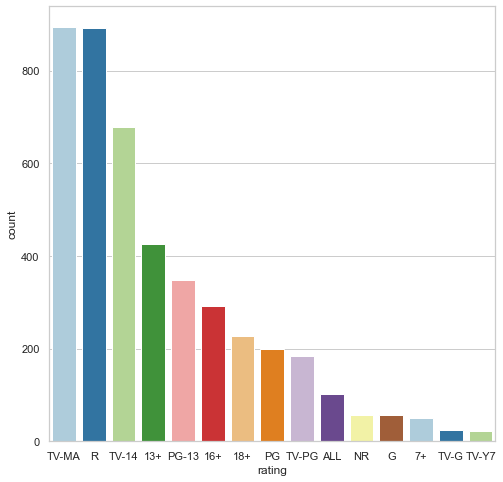

In [8]:
# Movie ratings Analysis -- movie rating of TV-MA & R count the most in our dataset
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.set(style="whitegrid")
ax = sns.countplot(x="rating", data=merged_data, palette="Paired", order=merged_data['rating'].value_counts().index[0:15])

In [9]:
ratings = pd.DataFrame({'Title':merged_data.title,
                       'Release Year':merged_data.year,
                       'Rating':merged_data.avg_vote,
                       'Genre':merged_data.genre,
                       'Country':merged_data.country})
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'],inplace=True)
ratings.dropna()
ratings.shape

(4665, 5)

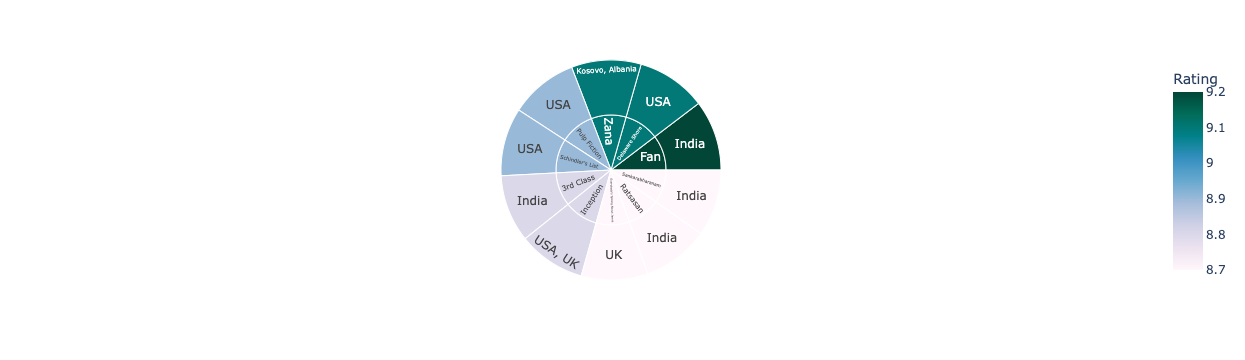

In [10]:
# Top rated 10 movies in our dataset are shown below by the pie chart.
!pip3 install plotly
ratingsA = ratings.sort_values(by='Rating', ascending=False)
import plotly.express as px
top_rated = ratingsA[0:10]
fig = px.sunburst(
top_rated,path=['Title', 'Country'],values='Rating', color='Rating', color_continuous_scale='PuBuGn')
fig.show()

In [11]:
countries = {}
merged_data['country'] = merged_data['country'].fillna('Unknown')
c = list(merged_data['country'])
for i in c:
    #print(i)
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

In [12]:
countriestop = {}
for country,no in countries.items():
    country = country.replace(' ','')
    if country in list(countriestop.keys()):
        countriestop[country] += no
    else:
        countriestop[country] = no
        
countriestop = {k: v for k, v in sorted(countriestop.items(), key = lambda item: item[1], reverse= True)}

[Text(0, 0, 'USA'),
 Text(1, 0, 'UK'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'Spain'),
 Text(7, 0, 'India'),
 Text(8, 0, 'Sweden'),
 Text(9, 0, 'China')]

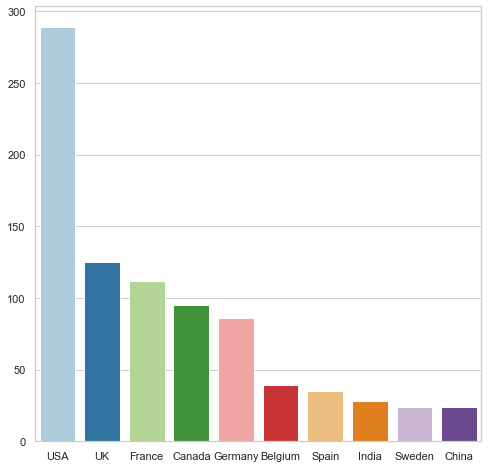

In [13]:
# Top 10 movie content creating countries in our dataset are shown above by the bar chart.
plt.figure(figsize = (8,8))
sns.set(style = "whitegrid")
ax = sns.barplot(x = list(countriestop.keys())[0:10],y = list(countriestop.values())[0:10], palette = "Paired")
ax.set_xticklabels(list(countriestop.keys())[0:10],rotation = 0)

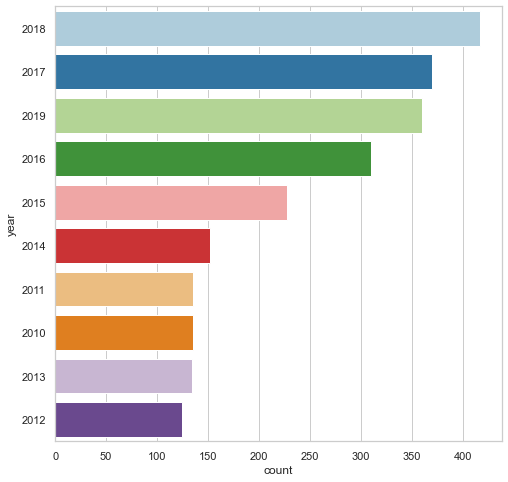

In [14]:
# Year wise analysis -- 2017 & 2018 were the years when most of the movies were released
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
ax = sns.countplot(y = 'year', data = merged_data, palette = "Paired", order = merged_data['year'].value_counts().index[0:10])

### 2) Movie analysis from the audience side 

#### WordCloud Analysis and Top Ten Movies Lists 

In [15]:
def get_top_n_description(df, column, n):
    description_list = list()
    top_n_df = df.sort_values(by=[column],ascending = False)[:n]
    for description in top_n_df["description"]:
        description = str(description).lower().strip('.')
        description_list.append(description)
    return ' '.join(description_list)

In [16]:
def draw_wordcloud(text):
    
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline

    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', colormap='tab20c',width=3000,height=3000).generate(text) 


    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

##### By gender:

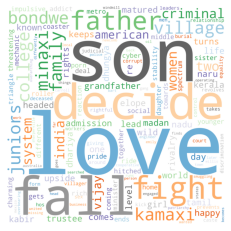

In [17]:
#top 10 rating movies descriptions by females
from wordcloud import WordCloud, STOPWORDS
#!pip install wordcloud
draw_wordcloud(get_top_n_description(merged_data, "females_allages_avg_vote", 10))

In [18]:
female_allages = merged_data.sort_values(by=["females_allages_avg_vote"],ascending = False)[:10]
female_allages[["title","females_allages_avg_vote"]].reset_index(drop=True)

title  females_allages_avg_vote
0              2 States                      10.0
1                Boyz 2                      10.0
2               Takatak                      10.0
3  Take Care Good Night                       9.9
4             3rd Class                       9.7
5           Manusangada                       9.7
6       Judge Singh LLB                       9.5
7  Tikli and Laxmi Bomb                       9.5
8      The Far Frontier                       9.3
9             Maha Maha                       9.1

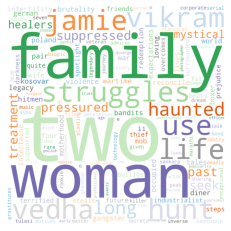

In [19]:
#top 10 rating movies descriptions by males
draw_wordcloud(get_top_n_description(merged_data, "males_allages_avg_vote", 10))

In [20]:
male_allages = merged_data.sort_values(by=["males_allages_avg_vote"],ascending = False)[:10]
male_allages[["title","males_allages_avg_vote"]].reset_index(drop=True)

title  males_allages_avg_vote
0                             Zana                     9.3
1                     Pulp Fiction                     8.9
2                 Schindler's List                     8.9
3  Everybody's Talking About Jamie                     8.8
4                        Inception                     8.8
5                  Sankarabharanam                     8.7
6                            Seven                     8.6
7    Ani... Dr. Kashinath Ghanekar                     8.6
8                      City of God                     8.6
9                     Vikram Vedha                     8.6

##### By age:

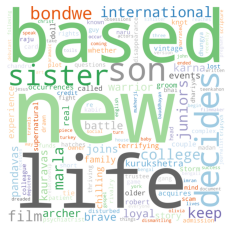

In [21]:
draw_wordcloud(get_top_n_description(merged_data, "allgenders_0age_avg_vote", 10))

In [22]:
age_below18 = merged_data.sort_values(by=["allgenders_0age_avg_vote"],ascending = False)[:10]
age_below18[["title","allgenders_0age_avg_vote"]].reset_index(drop=True)

title  allgenders_0age_avg_vote
0              Karnan                      10.0
1              Robert                      10.0
2             Görümce                      10.0
3       Elephant Song                      10.0
4           Withdrawn                      10.0
5              Boyz 2                      10.0
6              Anjaan                      10.0
7                Magi                      10.0
8           Teenkahon                      10.0
9  The Gospel of John                      10.0

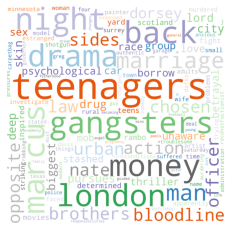

In [23]:
draw_wordcloud(get_top_n_description(merged_data, "allgenders_18age_avg_vote", 10))

In [24]:
age_18_30 = merged_data.sort_values(by=["allgenders_18age_avg_vote"],ascending = False)[:10]
age_18_30[["title","allgenders_18age_avg_vote"]].reset_index(drop=True)

title  allgenders_18age_avg_vote
0                Bloodline                       10.0
1                Skin Deep                       10.0
2                Free Ride                       10.0
3                   Serena                       10.0
4  One More Saturday Night                       10.0
5                Desperado                       10.0
6                 The Boys                       10.0
7              Modern Love                       10.0
8            Home and Away                       10.0
9             The Stand-In                       10.0

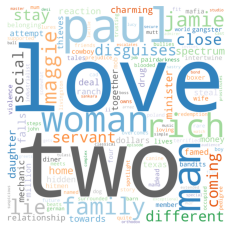

In [25]:
draw_wordcloud(get_top_n_description(merged_data, "allgenders_30age_avg_vote", 10))

In [26]:
age_30_45 = merged_data.sort_values(by=["allgenders_30age_avg_vote"],ascending = False)[:10]
age_30_45[["title","allgenders_30age_avg_vote"]].reset_index(drop=True)

title  allgenders_30age_avg_vote
0                   Hello Memsaheb                        9.2
1                        3rd Class                        9.2
2                      Copper Bill                        9.0
3                     Pulp Fiction                        8.9
4  Everybody's Talking About Jamie                        8.9
5                 Schindler's List                        8.9
6                     Almost Human                        8.9
7                  Sankarabharanam                        8.8
8                      I Love Lucy                        8.7
9                         Gol Maal                        8.7

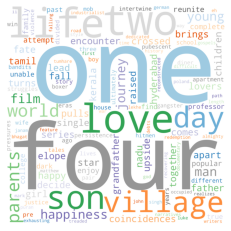

In [27]:
draw_wordcloud(get_top_n_description(merged_data, "allgenders_45age_avg_vote", 10))

In [28]:
age_above45 = merged_data.sort_values(by=["allgenders_45age_avg_vote"],ascending = False)[:10]
age_above45[["title","allgenders_45age_avg_vote"]].reset_index(drop=True)

title  allgenders_45age_avg_vote
0      Iddari Lokam Okate                       10.0
1                2 States                       10.0
2      Bhaskar Oru Rascal                       10.0
3                  Master                        9.9
4          Teen Aur Aadha                        9.0
5            Pulp Fiction                        8.7
6        Schindler's List                        8.7
7  Eh Janam Tumhare Lekhe                        8.6
8                   Jaanu                        8.5
9   The Gospel of Matthew                        8.5

### 3) Movie analysis from the movie maker side 

#### Genre Rating Analysis

In [29]:
# assign avg_vote_range for all movies
# set ranges from 0 to 10
# identify avg_vote to each range
# plot the Avg_vote_range
import numpy as np
df_merged_data=merged_data
conditions = [(df_merged_data['avg_vote']>=0) & (df_merged_data['avg_vote']<=1),(df_merged_data['avg_vote']>1) & (df_merged_data['avg_vote']<=2), (df_merged_data['avg_vote']>2) & (df_merged_data['avg_vote']<=3),(df_merged_data['avg_vote']>3) & (df_merged_data['avg_vote']<=4),(df_merged_data['avg_vote']>4) & (df_merged_data['avg_vote']<=5), (df_merged_data['avg_vote']>5) & (df_merged_data['avg_vote']<=6),(df_merged_data['avg_vote']>6) & (df_merged_data['avg_vote']<=7),(df_merged_data['avg_vote']>7) & (df_merged_data['avg_vote']<=8),(df_merged_data['avg_vote']>8) & (df_merged_data['avg_vote']<=9),(df_merged_data['avg_vote']>9) & (df_merged_data['avg_vote']<=10)]
choices = ["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10"] 
df_merged_data['Avg_vote_range'] = np.select(conditions, choices)
Avg_vote_range1 = df_merged_data.groupby(['Avg_vote_range'])
#set ranges from 0 to 10
#identify avg_vote to each range
#plot the Avg_vote_range

<AxesSubplot:xlabel='Avg_vote_range'>

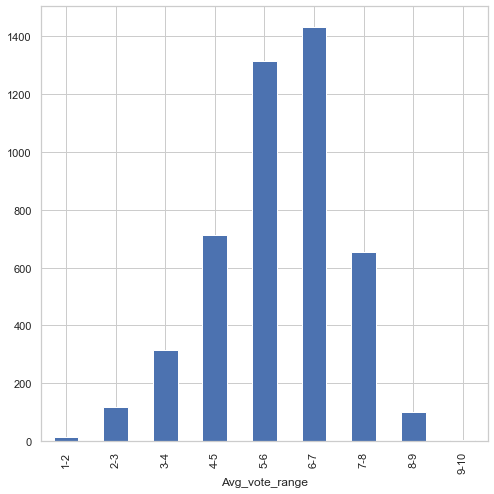

In [30]:
Avg_vote_range1.size().plot(kind='bar', figsize=(8,8))

In [31]:
def split_words(element):
    return element.split(',')

In [32]:
genre_merged_data = df_merged_data
genre_merged_data['genre'] = df_merged_data['genre'].str.split(',')
genre_merged_data = genre_merged_data.explode('genre')
genre_merged_data['genre'] = genre_merged_data['genre'].str.strip()
genre_count = genre_merged_data.groupby('genre')
genre_count.size().sort_values(ascending=False)
#count the size of each genre

genre
Drama        2738
Comedy       1382
Action        926
Thriller      922
Romance       821
Crime         665
Horror        638
Adventure     412
Mystery       355
Sci-Fi        259
Family        236
Biography     192
Fantasy       175
Animation     109
Music         109
Musical       108
History        91
Sport          82
War            69
Western        54
Film-Noir      16
dtype: int64

In [33]:
genre_merged_data.groupby(['Avg_vote_range'])['avg_vote'].describe()

count      mean       std  min   25%  50%    75%  max
Avg_vote_range                                                        
1-2               27.0  1.855556  0.169464  1.5  1.75  1.9  2.000  2.0
2-3              238.0  2.660924  0.259394  2.1  2.50  2.7  2.900  3.0
3-4              633.0  3.621643  0.264017  3.1  3.40  3.6  3.800  4.0
4-5             1537.0  4.571893  0.279934  4.1  4.30  4.6  4.800  5.0
5-6             2957.0  5.581163  0.275365  5.1  5.40  5.6  5.800  6.0
6-7             3190.0  6.509436  0.282291  6.1  6.30  6.5  6.800  7.0
7-8             1557.0  7.432498  0.267781  7.1  7.20  7.4  7.600  8.0
8-9              216.0  8.298148  0.211959  8.1  8.10  8.2  8.400  8.9
9-10               4.0  9.125000  0.050000  9.1  9.10  9.1  9.125  9.2

<AxesSubplot:ylabel='genre'>

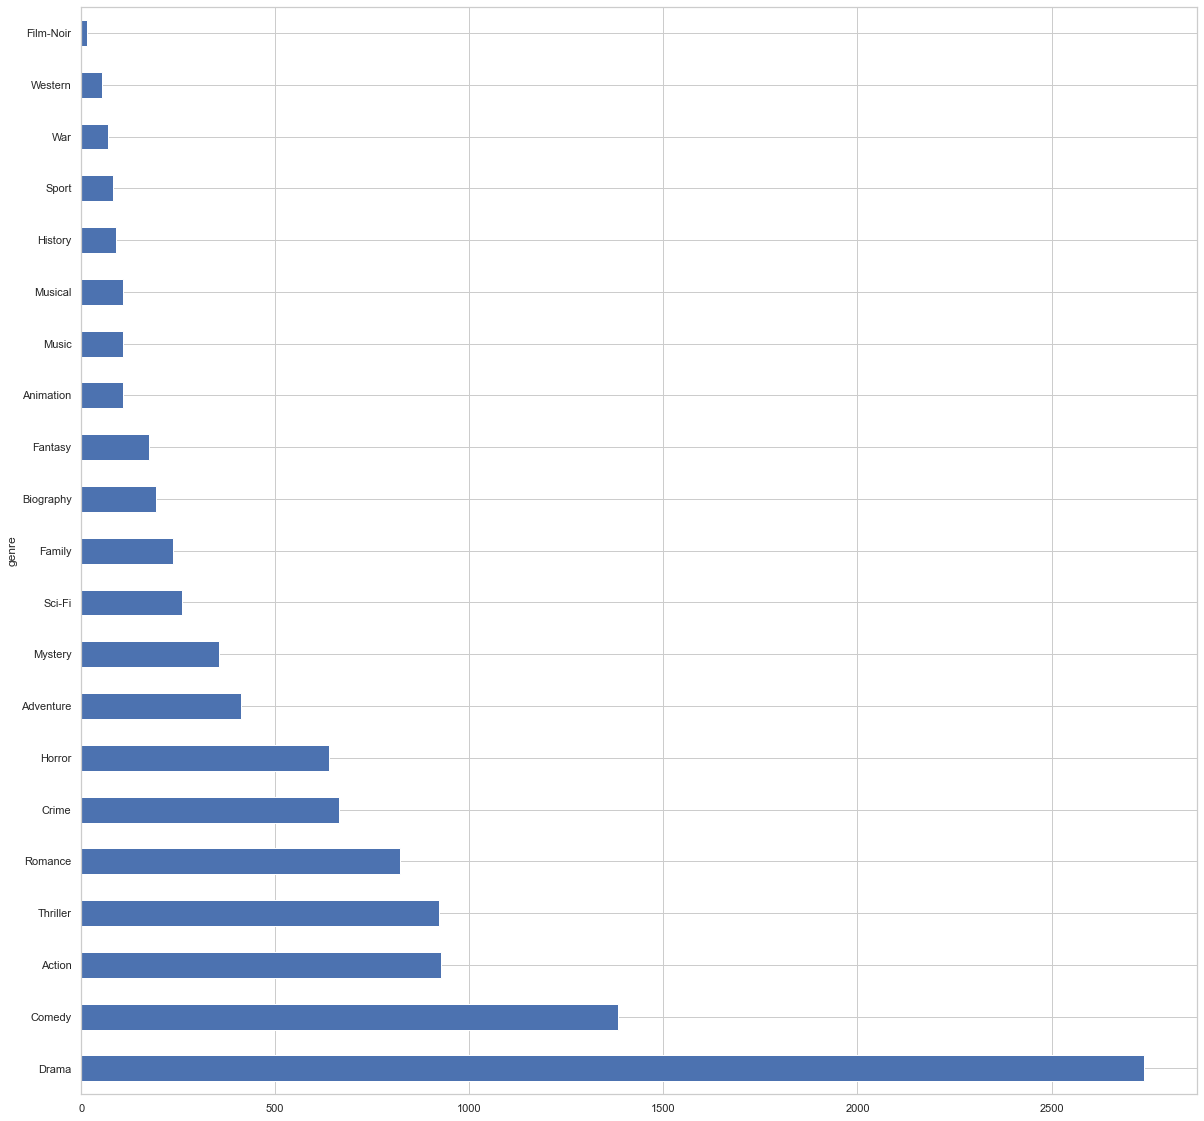

In [34]:
genre_count.size().sort_values(ascending=False).plot.barh(figsize=(20,20))

In [35]:
genre_vote = genre_merged_data.groupby(['genre','Avg_vote_range'])
genre_vote.size().unstack() #count each genre's related average vote range

Avg_vote_range  1-2   2-3    3-4    4-5    5-6    6-7    7-8   8-9  9-10
genre                                                                   
Action          6.0  35.0   80.0  170.0  251.0  236.0  129.0  19.0   NaN
Adventure       2.0  13.0   30.0   58.0  117.0  124.0   63.0   5.0   NaN
Animation       1.0   1.0    3.0    8.0   25.0   40.0   29.0   2.0   NaN
Biography       NaN   1.0    1.0    8.0   26.0   84.0   64.0   8.0   NaN
Comedy          3.0  20.0   83.0  198.0  441.0  428.0  187.0  22.0   NaN
Crime           NaN   9.0   43.0   97.0  191.0  192.0  113.0  20.0   NaN
Drama           4.0  30.0  115.0  305.0  720.0  971.0  515.0  75.0   3.0
Family          NaN   1.0    7.0   40.0   61.0   79.0   44.0   4.0   NaN
Fantasy         NaN   5.0    8.0   34.0   51.0   60.0   16.0   1.0   NaN
Film-Noir       NaN   NaN    NaN    NaN    7.0    7.0    2.0   NaN   NaN
History         NaN   2.0    NaN    4.0   18.0   37.0   28.0   2.0   NaN
Horror          2.0  51.0  101.0  169.0  208.0   87.0   18.0   2.0   NaN
Music           NaN   1.0    1.0    4.0   30.0   52.0   20.0   1.0   NaN
Musical         NaN   1.0    1.0   10.0   24.0   40.0   27.0   5.0   NaN
Mystery         1.0   6.0   16.0   62.0  121.0  105.0   34.0   9.0   1.0
Romance         1.0   8.0   24.0   97.0  242.0  303.0  129.0  17.0   NaN
Sci-Fi          1.0  23.0   26.0   65.0   65.0   58.0   18.0   3.0   NaN
Sport           NaN   2.0    2.0    8.0   29.0   23.0   15.0   3.0   NaN
Thriller        5.0  29.0   87.0  189.0  295.0  214.0   87.0  16.0   NaN
War             NaN   NaN    3.0    4.0   17.0   30.0   14.0   1.0   NaN
Western         1.0   NaN    2.0    7.0   18.0   20.0    5.0   1.0   NaN

In [36]:
def fix_vote(Avg_vote_range): #Only movies with avg_vote greater than 6 can be considered as great movies
    top_list = ["7-8","8-9","9-10"]
    if Avg_vote_range in top_list:
        return Avg_vote_range
    else:
        return np.NaN 


In [37]:
top_genre_merged_data = genre_merged_data
top_genre_merged_data['Avg_vote_range_high'] = top_genre_merged_data['Avg_vote_range'].apply(fix_vote)
top_genre_merged_data = top_genre_merged_data[top_genre_merged_data['Avg_vote_range_high'].notnull()]


<AxesSubplot:title={'center':'Average votes of each genre'}, xlabel='genre'>

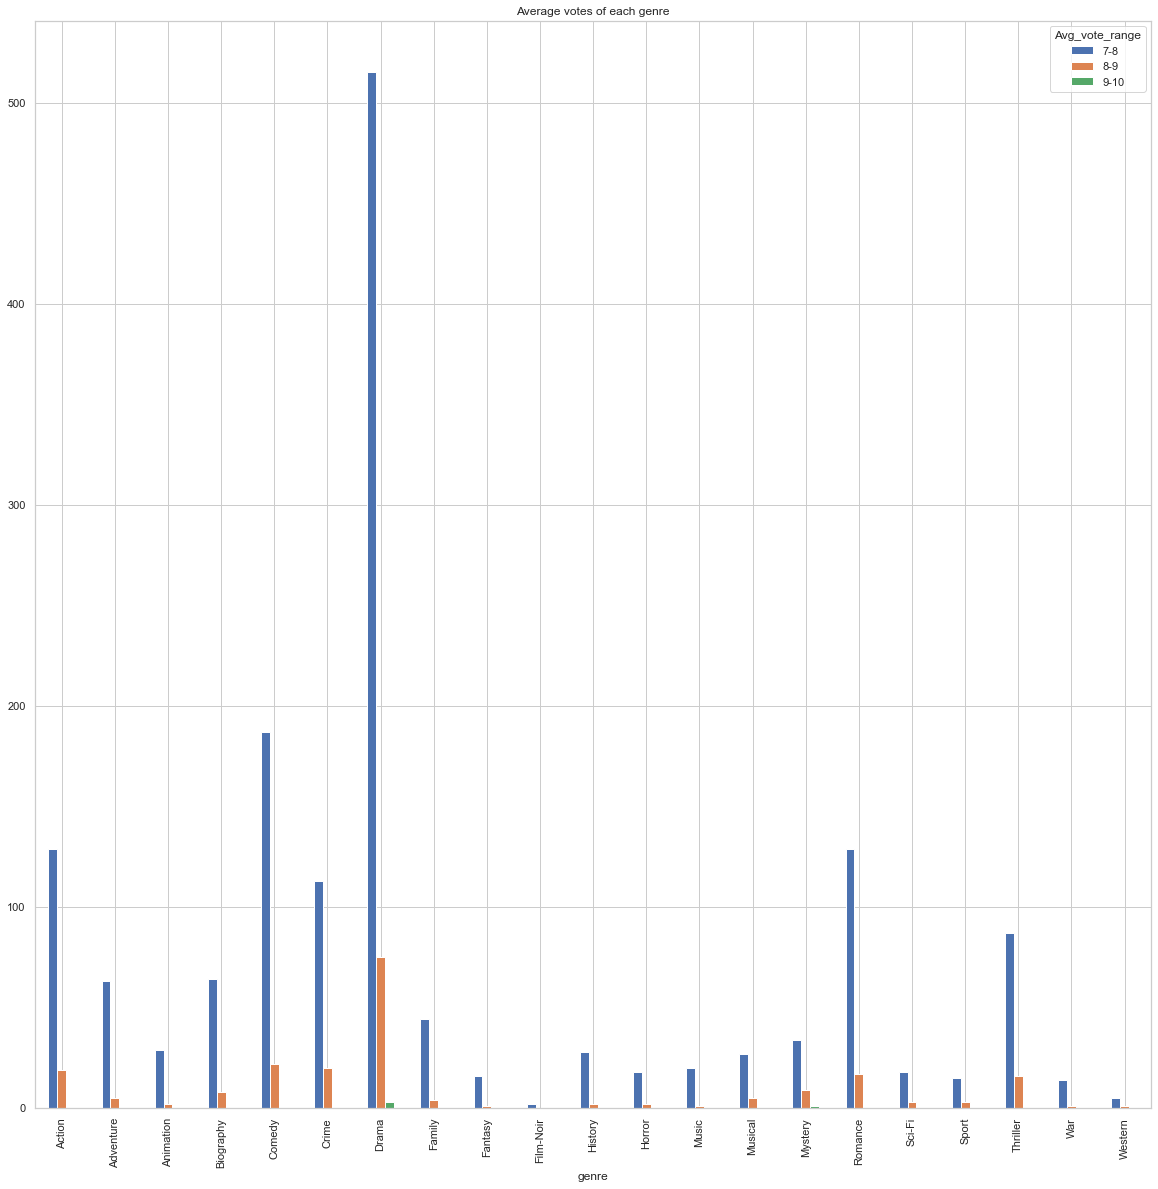

In [38]:
top_genre_vote = top_genre_merged_data.groupby(['genre','Avg_vote_range']) #genre distribution of movies which avg vote are greater than 6
top_genre_vote.size().unstack().plot(kind='bar',title="Average votes of each genre",figsize=(20,20))

In [39]:
def fix_genre(genre): #Only movies with avg_vote greater than 6 can be considered as great movies
    top_list = ["Drama","Comedy","Thriller","Action","Romance"]
    if genre in top_list:
        return genre
    else:
        return np.NaN 

In [40]:
top_genre_merged_data["genre"] = top_genre_merged_data['genre'].apply(fix_genre)
top_genre_merged_data = top_genre_merged_data[top_genre_merged_data['genre'].notnull()]

<ipython-input-40-0f368fdf5c63>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([<AxesSubplot:ylabel='7-8'>, <AxesSubplot:ylabel='8-9'>,
       <AxesSubplot:ylabel='9-10'>], dtype=object)

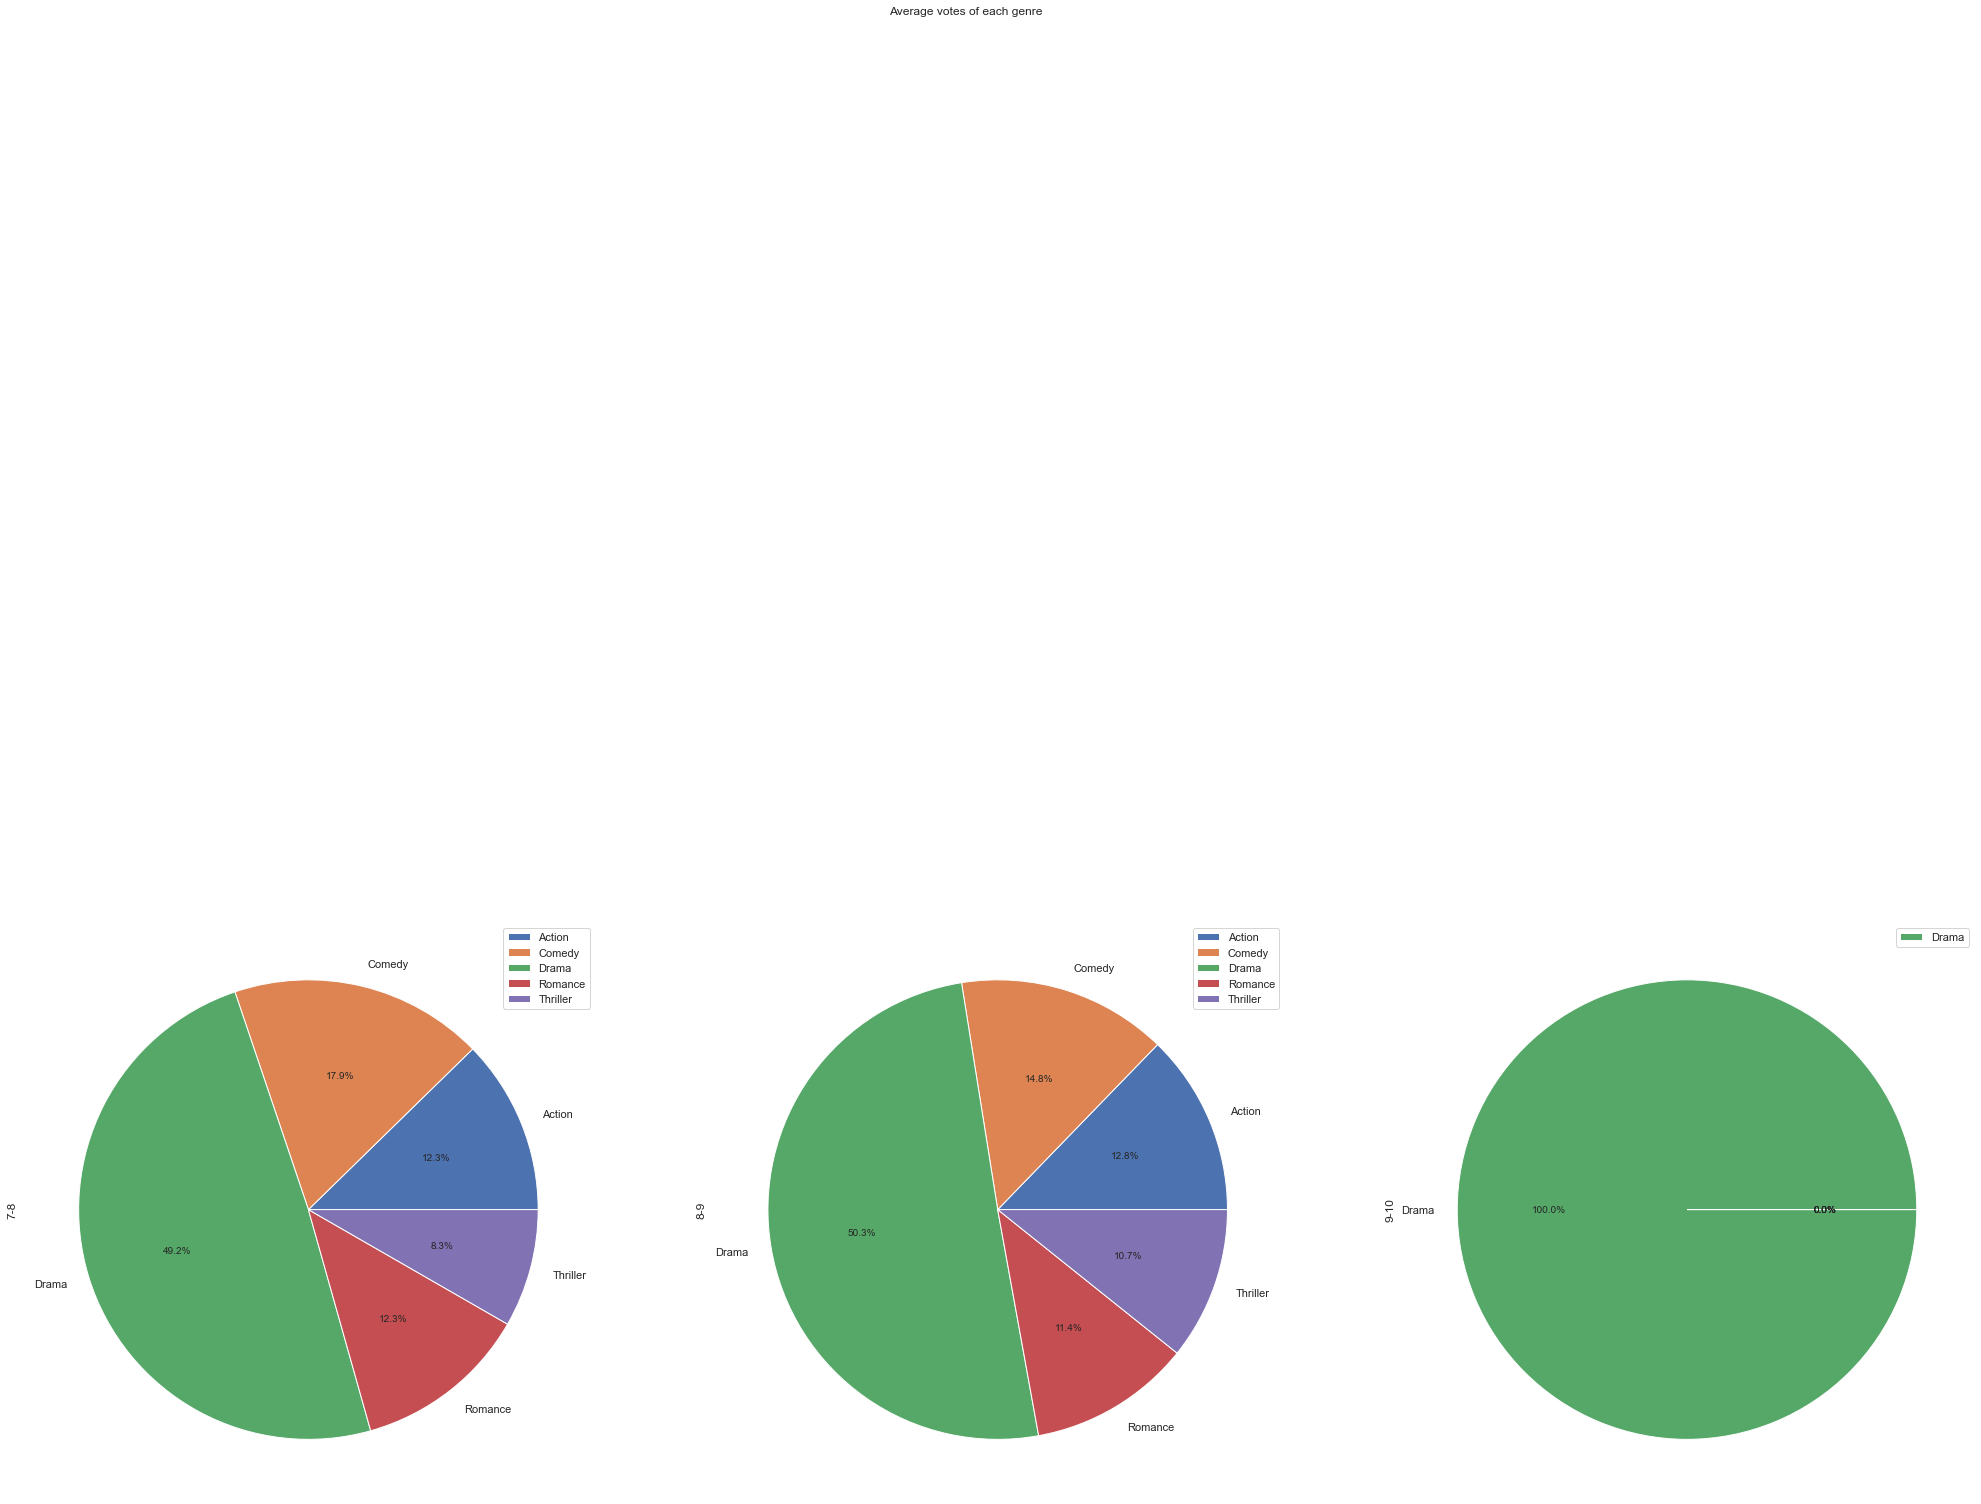

In [41]:
top_genre_vote = top_genre_merged_data.groupby(['genre','Avg_vote_range']) #genre distribution of movies which avg vote are greater than 6
top_genre_vote.size().unstack().plot(kind='pie',subplots=True,autopct='%1.1f%%', title="Average votes of each genre",figsize=(35,35))

In [42]:
actors_merged_data = df_merged_data 
actors_merged_data['actors'] = df_merged_data['actors'].str.split(',')
actors_merged_data = actors_merged_data.explode('actors') #get actors for each movie

In [43]:
actors_merged_data['actors'] = actors_merged_data['actors'].str.strip()
actor_count = actors_merged_data.groupby('actors')
actor_count.size().sort_values(ascending=False)

actors
Anupam Kher          40
Amitabh Bachchan     38
Naseeruddin Shah     30
Shah Rukh Khan       27
Paresh Rawal         27
                     ..
Hirakish Ranasaki     1
Hiralal               1
Hiram A. Murray       1
Hiro Arai             1
Þór Tulinius          1
Length: 45648, dtype: int64

In [44]:
def fix_vote1(Avg_vote_range): #actors with avg_vote greater than 9 are great actors for movie directors to consider
    top_list = ["9-10"]
    if Avg_vote_range in top_list:
        return Avg_vote_range
    else:
        return np.NaN 

In [45]:
top_actors_merged_data = actors_merged_data
top_actors_merged_data['Avg_vote_range_top'] = top_actors_merged_data['Avg_vote_range'].apply(fix_vote1)
top_actors_merged_data = top_actors_merged_data[top_actors_merged_data['Avg_vote_range_top'].notnull()]

In [46]:
actor_vote = top_actors_merged_data.groupby(['actors','Avg_vote_range_top'])
actor_vote.size().unstack()

Avg_vote_range_top   9-10
actors                   
Adriana Matoshi         1
Advithi Shetty          1
Arnis Berisha           1
Aryan Gowda             1
Astrit Kabashi          1
Aurora Berisha          1
Bella Dontine           1
Bislim Muçaj            1
Brenda Carey            1
Eansst Trower           1
Ed Aristone             1
Emily McKinley Hill     1
Erin Shann              1
Fatmire Sahiti          1
Gail Wagner             1
Ilire Vinca Celaj       1
Irena Cahani            1
James Robinson Jr.      1
Jason R. Maga           1
Kevin Austra            1
Kevin D. Benton         1
Kevin Francis           1
Kirsten Valania         1
Liz D'Alessio           1
Luan Kryeziu            1
Mandya Ramesh           1
Mensur Safqiu           1
Nate Farrar             1
Naveen D. Padil         1
Prasanna Shetty         1
Raghu Pandeshwar        1
Ravi Bhat               1
Rebekah Moss            1
Rozafa Celaj            1
Samiksha                1
Sangeetha Bhat          1
Shengyl Ismaili         1
Vedat Bajrami           1
Çun Lajçi               1

#### Recommend top rated actors/actresses to movie makers based on identified genre

In [47]:
def ave_rating_cal(x): #actors with avg_vote greater than 9 are great actors for movie directors to consider
    sum = 0
    count = 0
    for i in range(len(x)):
        if not math.isnan(x[i]):
            sum += x[i] * (i + 1.5)
            count += x[i]
    return sum/count

In [48]:
import math
genre_merged_data_sub = genre_merged_data[genre_merged_data['genre'] == 'Drama']
genre_merged_data_sub_actor = genre_merged_data_sub
genre_merged_data_sub_actor['actors'] = genre_merged_data_sub_actor['actors'].str.split(',')
genre_merged_data_sub_actor = genre_merged_data_sub_actor.explode('actors')
genre_merged_data_sub_actor
actor_vote = genre_merged_data_sub_actor.groupby(['actors','Avg_vote_range'])
# actor_vote.size().unstack() #count each genre's related average vote range
actor_vote = pd.DataFrame(actor_vote.size().unstack())
actor_vote['ave_rating_actor'] = actor_vote.apply(ave_rating_cal, axis=1)
actor_vote

<ipython-input-48-7e815d255e0d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Avg_vote_range        1-2  2-3  3-4  4-5  5-6  6-7  7-8  8-9  9-10  \
actors                                                               
 'Big Al' Solomon     NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN   
 'Nandha' Saravanan   NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   
 'University' Jeevan  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   
 .R.J. Vigneshkanth   NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   
 4-Zone               NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   
...                   ...  ...  ...  ...  ...  ...  ...  ...   ...   
Zoe Lister-Jones      NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   
Zoey Deutch           NaN  NaN  NaN  NaN  2.0  1.0  NaN  NaN   NaN   
Zora Howard           NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   
Zosia Mamet           NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   
Zuzana Mauréry        NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   

Avg_vote_range        ave_rating_actor  
actors                                  
 'Big Al' Solomon             3.500000  
 'Nandha' Saravanan           7.500000  
 'University' Jeevan          5.500000  
 .R.J. Vigneshkanth           7.500000  
 4-Zone                       5.500000  
...                                ...  
Zoe Lister-Jones              6.500000  
Zoey Deutch                   5.833333  
Zora Howard                   6.500000  
Zosia Mamet                   5.500000  
Zuzana Mauréry                7.500000  

[30028 rows x 10 columns]

In [49]:
genre_merged_data_sub = genre_merged_data[genre_merged_data['genre'] == 'Adventure']
genre_merged_data_sub_actor = genre_merged_data_sub
genre_merged_data_sub_actor['actors'] = genre_merged_data_sub_actor['actors'].str.split(',')
genre_merged_data_sub_actor = genre_merged_data_sub_actor.explode('actors')
genre_merged_data_sub_actor
actor_vote = genre_merged_data_sub_actor.groupby(['actors','Avg_vote_range'])
# actor_vote.size().unstack() #count each genre's related average vote range
actor_vote = pd.DataFrame(actor_vote.size().unstack())
actor_vote['counts'] = actor_vote.sum(axis=1)
actor_vote['ave_rating_actor'] = actor_vote.apply(ave_rating_cal, axis=1)
actor_vote_3 = actor_vote[actor_vote['counts'] >= 5]
actor_vote_3 = actor_vote_3['ave_rating_actor']
#actor_vote_3.sort_values(by=['ave_rating_actor'], ascending = False).head(20)
actor_vote_3
# actor_vote_3 = actor_vote_3.sort_values(ascending = False).head(20)

# actor_vote_3.plot(kind = 'barh').invert_yaxis()
# plt.title('Drama')
# plt.xlim([6, 8.5])
# plt.show()

<ipython-input-49-065392835be5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



actors
 Kim Coates       7.2
 Kirsten Dunst    8.3
 Rip Torn         8.0
Name: ave_rating_actor, dtype: float64

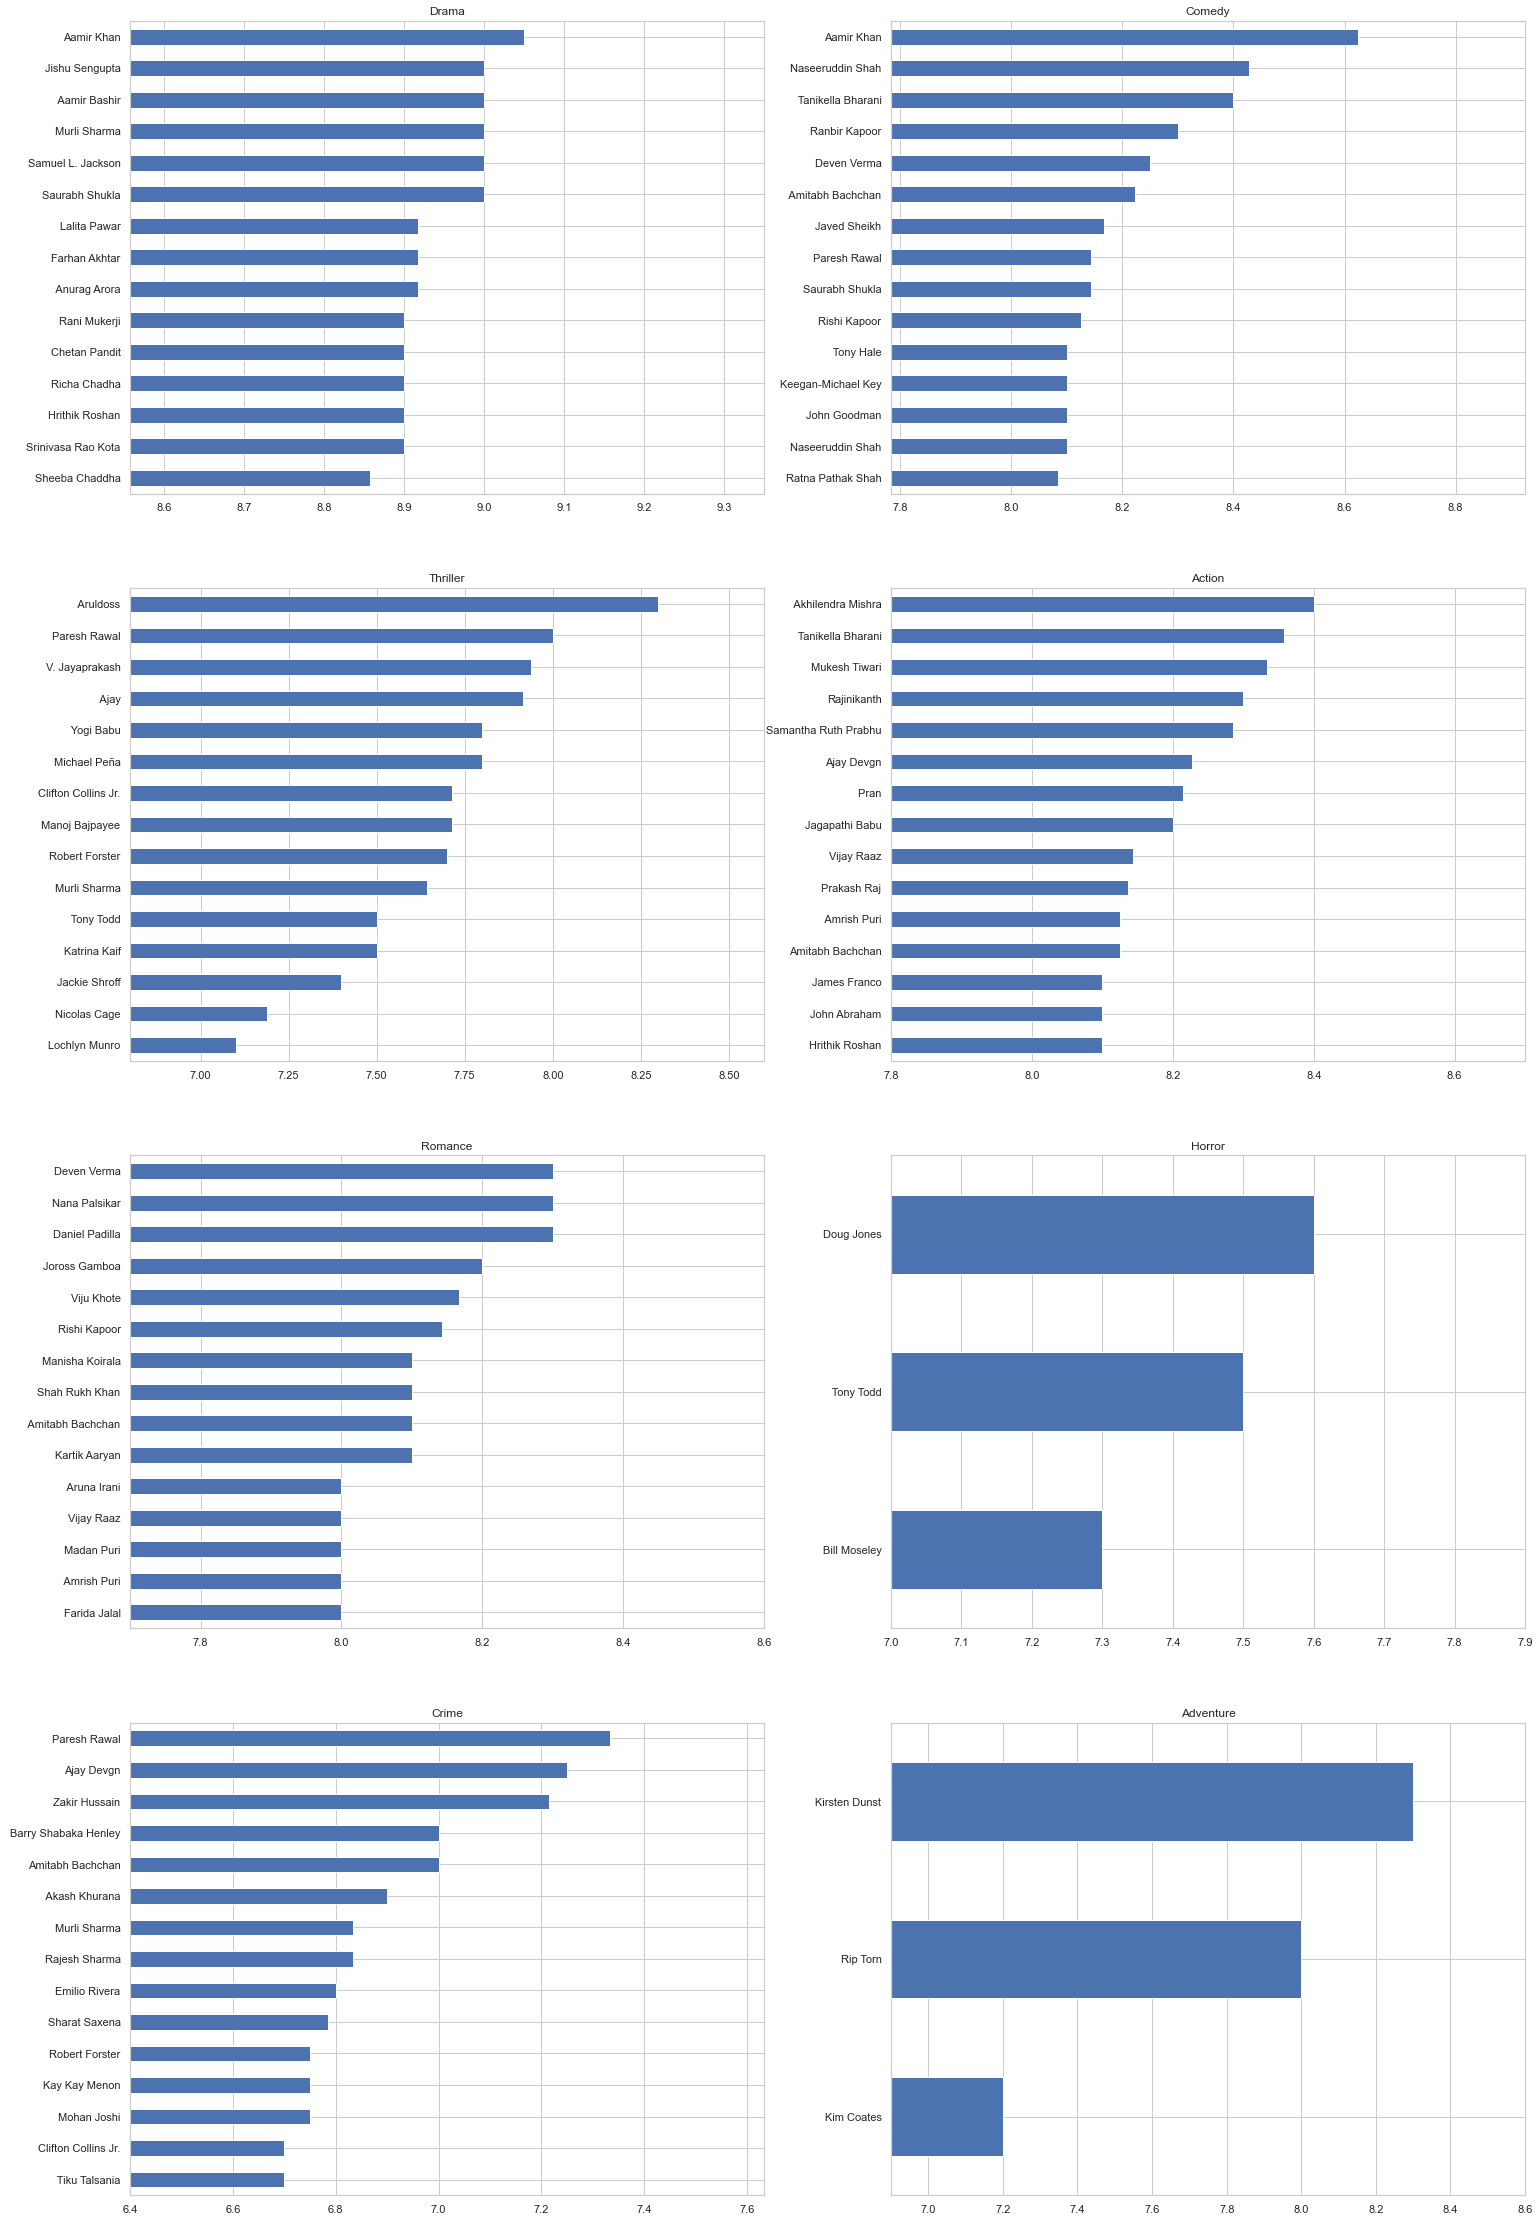

In [50]:
from matplotlib import pyplot as plt
import math
%matplotlib inline
COL_NUM = 2
ROW_NUM = 4
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(25,40))
genre_list = ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror', 'Crime', 'Adventure']
for i in range(len(genre_list)):
    pd.options.mode.chained_assignment = None  # default='warn'
    g = genre_list[i]
    genre_merged_data_sub = genre_merged_data[genre_merged_data['genre'] == g]
    genre_merged_data_sub_actor = genre_merged_data_sub
    genre_merged_data_sub_actor['actors'] = genre_merged_data_sub_actor['actors'].str.split(',')
    genre_merged_data_sub_actor = genre_merged_data_sub_actor.explode('actors')
    genre_merged_data_sub_actor
    actor_vote = genre_merged_data_sub_actor.groupby(['actors','Avg_vote_range'])
    # actor_vote.size().unstack() #count each genre's related average vote range
    actor_vote = pd.DataFrame(actor_vote.size().unstack())
    actor_vote['counts'] = actor_vote.sum(axis=1)
    actor_vote['ave_rating_actor'] = actor_vote.apply(ave_rating_cal, axis=1)
    actor_vote_3 = actor_vote[actor_vote['counts'] >= 5]
    actor_vote_3 = actor_vote_3['ave_rating_actor']
    #actor_vote_3.sort_values(by=['ave_rating_actor'], ascending = False).head(20)
    actor_vote_3 = actor_vote_3.sort_values(ascending = False).head(15)

    ax = axes[int(i/COL_NUM), i%COL_NUM]
    
    actor_vote_3.plot(kind = 'barh', ax = ax).invert_yaxis()
    ax.set_title(g)
    ax.set_ylabel('')
    ax.set_xlim([min(actor_vote_3) - 0.3, max(actor_vote_3) + 0.3])

#### Age Group preferences on directors:

In [51]:
# overall rating by director

director_rating = merged_data.groupby(by = 'director')["avg_vote"].mean().sort_values(ascending = False)

In [52]:
# rating of each population group by director
# age < 18
director_rating0 = merged_data.groupby(by = 'director')["allgenders_0age_avg_vote"].mean().sort_values(ascending = False)
dr0 = pd.DataFrame(director_rating0).reset_index()

# 18 <= age < 30
director_rating18 = merged_data.groupby(by = 'director')["allgenders_18age_avg_vote"].mean().sort_values(ascending = False)
dr18 = pd.DataFrame(director_rating18).reset_index()
# 30 <= age < 45
director_rating30 = merged_data.groupby(by = 'director')["allgenders_30age_avg_vote"].mean().sort_values(ascending = False)
dr30 = pd.DataFrame(director_rating30).reset_index()
# age >= 45
director_rating45 = merged_data.groupby(by = 'director')["allgenders_45age_avg_vote"].mean().sort_values(ascending = False)
dr45 = pd.DataFrame(director_rating45).reset_index()

#dr0[dr0["director"] == "Balavalli Darshith Bhat"]

In [53]:
# director rating: overall avg_vote and avg_vote by age
director_rating.head(25)
director = pd.DataFrame(director_rating)

director_table = pd.merge(director, dr0, left_on = "director", right_on = "director")
director_table = pd.merge(director_table, dr18, left_on = "director", right_on = "director")
director_table = pd.merge(director_table, dr30, left_on = "director", right_on = "director")
director_table = pd.merge(director_table, dr45, left_on = "director", right_on = "director")
director_table = director_table.rename(columns = {'allgenders_0age_avg_vote': '<18_avg_vote','allgenders_18age_avg_vote':'18_30_avg_vote','allgenders_30age_avg_vote': '30_45_avg_vote','allgenders_45age_avg_vote':'>45_avg_vote'})
director_table.head(10)

director  avg_vote  <18_avg_vote  18_30_avg_vote  \
0         Balavalli Darshith Bhat       9.2           NaN             6.3   
1                     Raghav Peri       9.1           NaN             6.3   
2               Antoneta Kastrati       9.1           7.4             9.8   
3               Christopher Nolan       8.8           9.0             9.0   
4              Jonathan Butterell       8.7           NaN             8.5   
5                    K. Viswanath       8.7           9.5             8.7   
6                       Parthiban       8.6           9.6             8.7   
7  Fernando Meirelles, Kátia Lund       8.6           8.4             8.7   
8      Abhijeet Shirish Deshpande       8.6           NaN             8.6   
9                    Harjit Singh       8.6           NaN             8.7   

   30_45_avg_vote  >45_avg_vote  
0             4.0           1.0  
1             5.5           6.7  
2             7.0           6.9  
3             8.7           8.1  
4             8.9           8.2  
5             8.8           5.7  
6             8.2           6.9  
7             8.6           8.3  
8             8.5           5.6  
9             8.3           8.6

#### duration analysis

<AxesSubplot:title={'center':'Average vote range of duration range'}, xlabel='duration_range'>

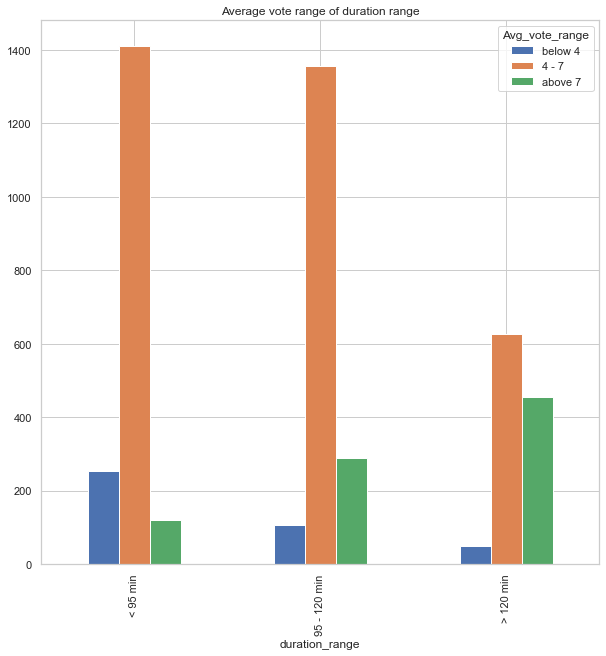

In [54]:
df_merged_data_duration=merged_data
conditions_duration = [(df_merged_data_duration['duration']<95), (df_merged_data_duration['duration']>=95) & (df_merged_data_duration['duration']<120), df_merged_data_duration['duration']>=120]
choices_duration = ["< 95 min","95 - 120 min","> 120 min"] 
df_merged_data_duration['duration_range'] = np.select(conditions_duration, choices_duration)
conditions_avg_vote = [(df_merged_data_duration['avg_vote'] < 4),(df_merged_data_duration['avg_vote']>=4) & (df_merged_data_duration['avg_vote']<7), (df_merged_data_duration['avg_vote'] >= 7)]
choices_avg_vote = ["below 4","4 - 7","above 7"] 
df_merged_data_duration['Avg_vote_range'] = np.select(conditions_avg_vote, choices_avg_vote)
duration_vote = df_merged_data_duration.groupby(['duration_range','Avg_vote_range'])
duration_vote_table = duration_vote.size().unstack()[["below 4", "4 - 7", "above 7"]].reindex(["< 95 min","95 - 120 min","> 120 min"])
duration_vote_table.plot(kind='bar',title="Average vote range of duration range",figsize=(10,10))

### II. Movie Recommender

In [55]:
# create a dataframe for movie recommender
mr_data = merged_data[["title", 'genre', 'description',"director","writer","actors"]]

# split genre
genre_split_df = mr_data['genre'].str.split(",")#.rename(columns = {0:"genre 1", 1:"genre 2", 2:"genre 3"})

# split director
director_split_df = mr_data["director"].str.split(",")#, expand = True).rename(columns = {0:"director 1", 1:"director 2"})

# split description
description_split_df = mr_data["description"].str.split()

# split writer
writer_split_df = mr_data["writer"].str.split(",")

# split actors
actors_split_df = mr_data["actors"].str.split(",")

mr_data = pd.merge(mr_data, genre_split_df, left_index = True, right_index = True)
mr_data = pd.merge(mr_data, director_split_df, left_index = True, right_index = True)
mr_data = pd.merge(mr_data, description_split_df, left_index = True, right_index = True)
mr_data = pd.merge(mr_data, writer_split_df, left_index = True, right_index = True)
mr_data = pd.merge(mr_data, actors_split_df, left_index = True, right_index = True)
mr_data

title                           genre_x  \
0                         Atlantis                           [Drama]   
4                       Cinderella                 [Fantasy,  Drama]   
8              Alice in Wonderland    [Adventure,  Family,  Fantasy]   
16                          Carmen                           [Drama]   
19    20,000 Leagues Under the Sea     [Action,  Adventure,  Sci-Fi]   
...                            ...                               ...   
6352                   Dream Horse      [Biography,  Comedy,  Drama]   
6353                 Bulletproof 2                 [Action,  Comedy]   
6354        The Pilgrim's Progress  [Animation,  Adventure,  Family]   
6355               Coffee & Kareem                 [Action,  Comedy]   
6356                        Jessie               [Horror,  Thriller]   

                                          description_x        director_x  \
0     After Dr. Friedrich's wife becomes mentally un...       August Blom   
4     Though mistreated by her cruel stepmother and ...    James Kirkwood   
8     Alice goes with her sister to a picnic and the...        W.W. Young   
16    In order to help her smuggler kinsmen, a sultr...  Cecil B. DeMille   
19    A French professor and his daughter accompany ...      Stuart Paton   
...                                                 ...               ...   
6352  Dream Alliance is an unlikely race horse bred ...         Euros Lyn   
6353  Set 25 years after, Jack is now working as a S...  Don Michael Paul   
6354  An epic journey, faithfully adapted to modern-...  Robert Fernandez   
6355  Twelve-year-old Kareem Manning hires a crimina...     Michael Dowse   
6356  Set in an abandoned house, the film follows a ...   Aswani Kumar V.   

                                  writer_x  \
0            Axel Garde, Gerhart Hauptmann   
4                         Charles Perrault   
8                Lewis Carroll, W.W. Young   
16    Prosper Mérimée, William C. de Mille   
19                             Jules Verne   
...                                    ...   
6352                            Neil McKay   
6353         Don Michael Paul, Rich Wilkes   
6354         John Bunyan, Robert Fernandez   
6355                            Shane Mack   
6356                       Aswani Kumar V.   

                                               actors_x  genre_y  \
0     [Olaf Fønss,  Ida Orloff,  Ebba Thomsen,  Carl...      NaN   
4     [Mary Pickford,  Owen Moore,  Isabel Vernon,  ...      NaN   
8     [Viola Savoy,  Herbert Rice,  Harry Marks,  Lo...      NaN   
16    [Geraldine Farrar,  Wallace Reid,  Pedro de Co...      NaN   
19    [Dan Hanlon,  Edna Pendleton,  Curtis Benton, ...      NaN   
...                                                 ...      ...   
6352  [Toni Collette,  Damian Lewis,  Siân Phillips,...      NaN   
6353  [Faizon Love,  Kirk Fox,  Tony Todd,  Cassie C...      NaN   
6354  [David Thorpe,  John Rhys-Davies,  Kristyn Get...      NaN   
6355  [Ed Helms,  Taraji P. Henson,  Terrence Little...      NaN   
6356  [Ashima Narwal,  Sritha Chandana,  Atul Kulkar...      NaN   

              director_y                                      description_y  \
0          [August Blom]  [After, Dr., Friedrich's, wife, becomes, menta...   
4       [James Kirkwood]  [Though, mistreated, by, her, cruel, stepmothe...   
8           [W.W. Young]  [Alice, goes, with, her, sister, to, a, picnic...   
16    [Cecil B. DeMille]  [In, order, to, help, her, smuggler, kinsmen,,...   
19        [Stuart Paton]  [A, French, professor, and, his, daughter, acc...   
...                  ...                                                ...   
6352         [Euros Lyn]  [Dream, Alliance, is, an, unlikely, race, hors...   
6353  [Don Michael Paul]  [Set, 25, years, after,, Jack, is, now, workin...   
6354  [Robert Fernandez]  [An, epic, journey,, faithfully, adapted, to, ...   
6355     [Michael Dowse]  [Twelve-year-old, Kareem, Manning, hires, a, c...   


In [56]:
# Part 1: TfIdVectorizer

# import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# define a TF-IDF vectorizer object and remove stop words
tfidf = TfidfVectorizer(stop_words='english')

# replace NaN with empty string
merged_data['description'] = merged_data['description'].fillna('')

# construct the TF-IDF matrix
# total number of distinct words used in description
# used more frequently, higher, used by more documents, lower
tfidf_matrix = tfidf.fit_transform(merged_data['description'])
print(tfidf_matrix.shape)
# 5731 movies, each with 15129 different words/features 

# select feature name
tfidf.get_feature_names()[500:510]

# compute cosine_sim
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape
cosine_sim[1]

indices = pd.Series(merged_data.index, index=merged_data['title']).drop_duplicates()


(4665, 13674)


In [57]:
# Part 2: count_vectorizer

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''
        
features = ['director_y', 'genre_y',"description_y", "writer_y","actors_y"]


for feature in features:
    mr_data[feature] = mr_data[feature].apply(clean_data)
    
def create_soup(x):
    return ' '.join(x['director_y']) + ' ' + ' '.join(x['genre_y'])+ ' ' + ' '.join(x['actors_y'])+ ' ' + ' '.join(x['writer_y'])+ ' ' + ' '.join(x['description_y'])

mr_data['soup'] = mr_data.apply(create_soup, axis=1)
print(mr_data[["soup"]].head(10))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(mr_data['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

#mr_data = mr_data.drop(columns = ["level_0"])
mr_data = mr_data.reset_index()
indices = pd.Series(mr_data.index, index=mr_data['title'])

                                                 soup
0   augustblom   axelgarde gerharthauptmann after ...
4   jameskirkwood   charlesperrault though mistrea...
8   w.w.young   lewiscarroll w.w.young alice goes ...
16  cecilb.demille   prospermérimée williamc.demil...
19  stuartpaton   julesverne a french professor an...
21  arthurberthelet   h.s.sheldon williamgillette ...
26  j.searledawley   winthropames winthropames sno...
28  f.richardjones jamesyoung   hamptondelruth j.g...
30  paulpowell   eleanorh.porter catherinechisholm...
32  oscarmicheaux   oscarmicheaux abandoned by her...


In [58]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # find the input movie's index
    movie_index = indices[title]

    # get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]

    # find the movie indices for top 20 most similar movies
    movie_indices = [i[0] for i in sim_scores]
    
    # add popularity filter by sorting these movies by avg_vote
    top_movies = pd.DataFrame(columns = ['title','rating'])
    for i in movie_indices:
        top_movies = top_movies.append({"title": merged_data.iloc[i]['title'], "rating": merged_data.iloc[i]['avg_vote']}, ignore_index = True)
    top_movies = top_movies.sort_values(by = "rating", ascending = False)
    
    # return the top 10 most popular movies among 20 most similar movies
    return top_movies[:9]

In [59]:
# recommendation based on description
get_recommendations('Jessie', cosine_sim)

title  rating
8                Little Dorrit     7.3
10      The Eagle and the Hawk     7.1
14                Chandramukhi     7.1
18  Christmas in the Heartland     5.9
7                      Vox Lux     5.9
17                The Neighbor     5.8
4                     Euphoria     5.8
6         A Sort of Homecoming     5.8
19             Suburban Gothic     5.5

In [60]:
# recommendation based on genre, director, description
get_recommendations('Jessie', cosine_sim2)

title  rating
9                    Teenkahon     7.4
17                Chandramukhi     7.1
13  It Takes a Man and a Woman     6.7
11            Operation Finale     6.6
18                     Vox Lux     5.9
7                 The Neighbor     5.8
8                     Euphoria     5.8
4    Hamara Dil Aapke Paas Hai     5.6
16             Suburban Gothic     5.5

### Recommendation Machine

In [61]:
def movie_recommender():
    name = input("""Please enter the name of your favorite movie: For example, [Jessie] for the movie Jessie""")
    similarity = input("""Do you want recommendations based on [1] for description only or [2] for a combination of genre, director, description? """)
    if similarity == "1":
        print(get_recommendations(name, cosine_sim))
    elif similarity == "2":
        print(get_recommendations(name, cosine_sim2))

In [62]:
movie_recommender()

Please enter the name of your favorite movie: For example, [Jessie] for the movie Jessie Jessie
Do you want recommendations based on [1] for description only or [2] for a combination of genre, director, description?  2


                         title  rating
9                    Teenkahon     7.4
17                Chandramukhi     7.1
13  It Takes a Man and a Woman     6.7
11            Operation Finale     6.6
18                     Vox Lux     5.9
7                 The Neighbor     5.8
8                     Euphoria     5.8
4    Hamara Dil Aapke Paas Hai     5.6
16             Suburban Gothic     5.5


### III. Rating Prediction System

In [63]:
df = merged_data
df = df[['title', 'genre', 'duration', 'director','production_company', 'actors', 'avg_vote','type', 'description']]
conditions_duration = [(df['duration']<95), (df['duration']>=95) & (df['duration']<120), df['duration']>=120]
choices_duration = ["< 95 min","95 - 120 min","> 120 min"] 
df['duration_range'] = np.select(conditions_duration, choices_duration)

df['director'] = df['director'].str.split(',')

df = df.explode('genre')
df = df.explode('actors')
df = df.explode('director')

df = df.reset_index(drop = True)

df['genre'] = df['genre'].str.strip(' ')
df['actors'] = df['actors'].str.strip(' ')
df['director']= df['director'].str.strip(' ')

dummies_duration_range = pd.get_dummies(df['duration_range'])
dummies_duration_range = dummies_duration_range.reset_index(drop = True)

dummies_genre = pd.get_dummies(df['genre'])
dummies_genre = dummies_genre.reset_index(drop = True)

dummies_type = pd.get_dummies(df['type'])
dummies_type = dummies_type.reset_index(drop = True)

df = pd.concat([df, dummies_duration_range, dummies_genre, dummies_type], axis=1)
df_movie = df[df['Movie'] == 1].reset_index(drop=True)
df_tv_show = df[df['TV Show'] == 1].reset_index(drop=True)

In [64]:
#webscraping from the numbers website
import pandas as pd
def get_factor_ranking_first_page(url, data_dict, start_page_index):
    import requests
    from bs4 import BeautifulSoup
    page = BeautifulSoup(requests.get(url).content,'lxml')
    category_data = page.find_all("tr")
    for table in category_data[7:]:
        info = table.find_all("td")
        name = info[1].find("b").get_text()
        url = 'https://www.the-numbers.com'+info[1].find("b").find("a").get("href")
        Worldwide_Box_Office = info[2].get_text()
        number_of_movies = int(info[3].get_text())
        average_box = info[4].get_text()
        data_dict[start_page_index] = {"name": name, "link": url, "Worldwide_Box_Office": Worldwide_Box_Office, "number_of_movies": number_of_movies, "average_box": average_box}
        start_page_index += 1
def get_factor_ranking_each_page(url, data_dict, start_page_index):
    import requests
    from bs4 import BeautifulSoup
    page = BeautifulSoup(requests.get(url).content,'lxml')
    category_data = page.find_all("tr")
    for table in category_data[1:]:
        info = table.find_all("td")
        name = info[1].find("b").get_text()
        url = 'https://www.the-numbers.com'+info[1].find("b").find("a").get("href")
        Worldwide_Box_Office = info[2].get_text()
        number_of_movies = int(info[3].get_text())
        average_box = info[4].get_text()
        data_dict[start_page_index] = {"name": name, "link": url, "Worldwide_Box_Office": Worldwide_Box_Office, "number_of_movies": number_of_movies, "average_box": average_box}
        start_page_index += 1
def get_all_directors_ranking(n, data_dict):
    for i in range(n):
        page_number = str(i * 100 + 1)
        url = f"https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-specific-technical-role/director/{page_number}"
        if i == 0:
            get_factor_ranking_first_page(url, data_dict, int(page_number)-1)
        else:
            get_factor_ranking_each_page(url, data_dict, int(page_number)-1)
    return data_dict
def get_all_actors_ranking(n, data_dict):
    for i in range(n):
        page_number = str(i * 100 + 1)
        url = f"https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/{page_number}"
        if i == 0:
            get_factor_ranking_first_page(url, data_dict, int(page_number)-1)
        else:
            get_factor_ranking_each_page(url, data_dict, int(page_number)-1)
    return data_dict
def get_production_ranking_each_page(url, data_dict, start_page_index):
    import requests
    from bs4 import BeautifulSoup
    page = BeautifulSoup(requests.get(url).content,'lxml')
    category_data = page.find_all("tr")
    for table in category_data[1:]:
        info = table.find_all("td")
        name = info[0].find("b").get_text()
        url = 'https://www.the-numbers.com'+info[0].find("b").find("a").get("href")
        Worldwide_Box_Office = info[2].get_text()
        number_of_movies = int(info[1].get_text())
        average_box = info[3].get_text()
        data_dict[start_page_index] = {"name": name, "link": url, "Worldwide_Box_Office": Worldwide_Box_Office, "number_of_movies": number_of_movies, "average_box": average_box}
        start_page_index += 1

Save data into csv and due to the long running time, we directly loaded the three datasets for further analysis

In [65]:
#director_dict = dict()
#director_data = pd.DataFrame.from_dict(get_all_directors_ranking(159, director_dict)).transpose()[["name", "Worldwide_Box_Office","number_of_movies","average_box","link"]]
#director_data.to_csv("/Users/linziguan/Desktop/DA Group Project/DA Project/director_data.csv")
#actor_dict = dict()
#actor_data = pd.DataFrame.from_dict(get_all_actors_ranking(100, actor_dict)).transpose()[["name", "Worldwide_Box_Office","number_of_movies","average_box","link"]]
#actor_data.to_csv("/Users/linziguan/Desktop/DA Group Project/DA Project/actor_data.csv")
#production_dict = dict()
#production_url = "https://www.the-numbers.com/movies/production-companies/#production_companies_overview=od1"
#get_production_ranking_each_page(production_url, production_dict, 0)
#production_data = pd.DataFrame.from_dict(production_dict).transpose()[["name", "Worldwide_Box_Office","number_of_movies","average_box","link"]]
#production_data.to_csv("/Users/linziguan/Desktop/DA Group Project/DA Project/production_data.csv")

In [66]:
director_data = pd.read_csv("director_data.csv", index_col = 0)
director_data["rank"] = director_data.index.values+1
actor_data = pd.read_csv("actor_data.csv", index_col = 0)
actor_data["rank"] = actor_data.index.values+1
production_data = pd.read_csv("production_data.csv", index_col = 0)
production_data["rank"] = production_data.index.values+1

In [67]:
director = director_data[["name","rank"]].set_index("name")
director_25th = director.quantile(0.25)[0]
director_50th = director.quantile(0.5)[0]
director_75th = director.quantile(0.75)[0]
director_ranking = director.to_dict()
director_ranking = director_ranking["rank"]
df_movie["director_ranking"] = df_movie["director"].apply(lambda x: director_ranking[x] if x in director_ranking.keys() else "NA")
df_movie = df_movie[df_movie["director_ranking"] != "NA"]
actor = actor_data[["name","rank"]].set_index("name")
actor_25th = actor.quantile(0.25)[0]
actor_50th = actor.quantile(0.5)[0]
actor_75th = actor.quantile(0.75)[0]
actor_ranking = actor.to_dict()
actor_ranking = actor_ranking["rank"]
df_movie["actor_ranking"] = df_movie["actors"].apply(lambda x: actor_ranking[x] if x in actor_ranking.keys() else "NA")
df_movie = df_movie[df_movie["actor_ranking"] != "NA"]
production = production_data[["name","rank"]].set_index("name")
production_ranking = production.to_dict()
production_ranking = production_ranking["rank"]
production_25th = production.quantile(0.25)[0]
production_50th = production.quantile(0.5)[0]
production_75th = production.quantile(0.75)[0]
df_movie["production_ranking"] = df_movie["production_company"].apply(lambda x: production_ranking[x] if x in production_ranking.keys() else "NA")
df_movie = df_movie[df_movie["production_ranking"] != "NA"]
df_movie = df_movie.reset_index(drop=True)

In [68]:
for i in range(25,125,25):
    df_movie[f"{i-25}th_to_{i}th_percentile_director"] = df_movie["director_ranking"].apply(lambda x: 1 if x <= director.quantile(i/100)[0] and x >= director.quantile((i-25)/100)[0] else 0)
    df_movie[f"{i-25}th_to_{i}th_percentile_actor"] = df_movie["actor_ranking"].apply(lambda x: 1 if x <= actor.quantile(i/100)[0] and x >= actor.quantile((i-25)/100)[0] else 0)
    df_movie[f"{i-25}th_to_{i}th_percentile_production"] = df_movie["production_ranking"].apply(lambda x: 1 if x <= production.quantile(i/100)[0] and x >= production.quantile((i-25)/100)[0] else 0)

In [69]:
high = df_movie["avg_vote"].quantile(0.5)
df_movie["high_vote"] = df_movie["avg_vote"].apply(lambda x: 1 if x >= high else 0)
df_movie

title   genre  duration       director  \
0       Boy Meets Girl  Comedy        86    Lloyd Bacon   
1       Boy Meets Girl  Comedy        86    Lloyd Bacon   
2       Boy Meets Girl  Comedy        86    Lloyd Bacon   
3       Boy Meets Girl  Comedy        86    Lloyd Bacon   
4         Black Friday   Crime        70   Arthur Lubin   
...                ...     ...       ...            ...   
12850  Coffee & Kareem  Comedy        88  Michael Dowse   
12851  Coffee & Kareem  Comedy        88  Michael Dowse   
12852  Coffee & Kareem  Comedy        88  Michael Dowse   
12853  Coffee & Kareem  Comedy        88  Michael Dowse   
12854  Coffee & Kareem  Comedy        88  Michael Dowse   

                     production_company            actors  avg_vote   type  \
0                          Warner Bros.      James Cagney       6.0  Movie   
1                          Warner Bros.       Pat O'Brien       6.0  Movie   
2                          Warner Bros.     Ralph Bellamy       6.0  Movie   
3                          Warner Bros.     Ronald Reagan       6.0  Movie   
4                    Universal Pictures  Edmund MacDonald       6.3  Movie   
...                                 ...               ...       ...    ...   
12850  Pacific Electric Picture Company          Ed Helms       5.1  Movie   
12851  Pacific Electric Picture Company  Taraji P. Henson       5.1  Movie   
12852  Pacific Electric Picture Company      Betty Gilpin       5.1  Movie   
12853  Pacific Electric Picture Company  David Alan Grier       5.1  Movie   
12854  Pacific Electric Picture Company   Andrew Bachelor       5.1  Movie   

                                             description duration_range  ...  \
0      Two screenwriters in a rut come up with a stor...       < 95 min  ...   
1      Two screenwriters in a rut come up with a stor...       < 95 min  ...   
2      Two screenwriters in a rut come up with a stor...       < 95 min  ...   
3      Two screenwriters in a rut come up with a stor...       < 95 min  ...   
4      Dr. Sovac transplants the brain of a gangster ...       < 95 min  ...   
...                                                  ...            ...  ...   
12850  Twelve-year-old Kareem Manning hires a crimina...       < 95 min  ...   
12851  Twelve-year-old Kareem Manning hires a crimina...       < 95 min  ...   
12852  Twelve-year-old Kareem Manning hires a crimina...       < 95 min  ...   
12853  Twelve-year-old Kareem Manning hires a crimina...       < 95 min  ...   
12854  Twelve-year-old Kareem Manning hires a crimina...       < 95 min  ...   

       25th_to_50th_percentile_director  25th_to_50th_percentile_actor  \
0                                     0                              1   
1                                     0                              1   
2                                     0                              1   
3                                     0                              1   
4                                     0                              0   
...                                 ...                            ...   
12850                                 0                              0   
12851                                 0                              0   
12852                                 0                              1   
12853                                 0                              1   
12854                                 0                              1   

       25th_to_50th_percentile_production  50th_to_75th_percentile_director  \
0                                       0                                 0   
1                                       0                                 0   
2                                       0                                 0   
3                                       0                                 0   
4                                       0                                 0   
...                                   ...      

In [70]:
#avoid perfect collinearity
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
# column_list = ['title', 
#        '95 - 120 min', '< 95 min', '> 120 min', 'Action', 'Adventure',
#        'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
#        'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
#        'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
#        '0th_to_25th_percentile_director',
#        '0th_to_25th_percentile_actor', '0th_to_25th_percentile_production',
#        '25th_to_50th_percentile_director', '25th_to_50th_percentile_actor',
#        '25th_to_50th_percentile_production',
#        '50th_to_75th_percentile_director', '50th_to_75th_percentile_actor',
#        '50th_to_75th_percentile_production',
#        '75th_to_100th_percentile_director', '75th_to_100th_percentile_actor',
#        '75th_to_100th_percentile_production', 'high_vote']
column_list = ['title', '< 95 min', '> 120 min', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       '25th_to_50th_percentile_director', '50th_to_75th_percentile_director','75th_to_100th_percentile_director',
       '25th_to_50th_percentile_actor','50th_to_75th_percentile_actor', '75th_to_100th_percentile_actor',
       '25th_to_50th_percentile_production', '50th_to_75th_percentile_production', '75th_to_100th_percentile_production',
        'high_vote']
model_movies = df_movie[column_list]
model_movies.drop_duplicates(inplace=True) #?
model_movies = model_movies.reset_index(drop=True)
model_movies.describe()

< 95 min    > 120 min    Adventure    Animation    Biography  \
count  5616.000000  5616.000000  5616.000000  5616.000000  5616.000000   
mean      0.268162     0.256054     0.047543     0.015848     0.030271   
std       0.443042     0.436491     0.212816     0.124897     0.171346   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Comedy        Crime        Drama       Family      Fantasy  ...  \
count  5616.000000  5616.000000  5616.000000  5616.000000  5616.000000  ...   
mean      0.134972     0.072293     0.247685     0.019053     0.018519  ...   
std       0.341724     0.258996     0.431706     0.136722     0.134829  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       25th_to_50th_percentile_director  50th_to_75th_percentile_director  \
count                       5616.000000                       5616.000000   
mean                           0.181980                          0.119658   
std                            0.385862                          0.324590   
min                            0.000000                          0.000000   
25%                            0.000000                          0.000000   
50%                            0.000000                          0.000000   
75%                            0.000000                          0.000000   
max                            1.000000                          1.000000   

       75th_to_100th_percentile_director  25th_to_50th_percentile_actor  \
count                        5616.000000                    5616.000000   
mean                            0.052528                       0.251603   
std                             0.223110                       0.433973   
min                             0.000000                       0.000000   
25%                             0.000000                       0.000000   
50%                             0.000000                       0.000000   
75%                             0.000000                       1.000000   
max                             1.000000                       1.000000   

       50th_to_75th_percentile_actor  75th_to_100th_percentile_actor  \
count                    5616.000000                     5616.000000   
mean                        0.228098                        0.174679   
std                         0.419644                        0.379727   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         0.000000                        0.000000   
max                         1.000000                        1.000000   

       25th_to_50th_percentile_production  50th_to_75th_percentile_production  \
count                         5616.000000                         5616.000000   
mean                             0.121617                            0.110221   
std                              0.326872                            0.313193   
min                              0.000000                            0.000000   
25%                              0.000000                            0.000000   
50%                              0.000000                            0.000000   
75%                              0.000000    

In [71]:
model_movies.corr()
#higher ranking -> lower vote

< 95 min  > 120 min  Adventure  \
< 95 min                             1.000000  -0.355130   0.025312   
> 120 min                           -0.355130   1.000000  -0.004537   
Adventure                            0.025312  -0.004537   1.000000   
Animation                            0.116296  -0.071180  -0.028351   
Biography                           -0.090527   0.046364  -0.039473   
Comedy                               0.087911  -0.089655  -0.088252   
Crime                               -0.023085   0.028423  -0.062368   
Drama                               -0.080091   0.033862  -0.128195   
Family                               0.045003  -0.016108  -0.031137   
Fantasy                             -0.029483  -0.026115  -0.030689   
History                             -0.051176   0.097767  -0.023217   
Horror                               0.122518  -0.105352  -0.049026   
Music                               -0.028951  -0.005897  -0.027697   
Musical                             -0.017292   0.052039  -0.017693   
Mystery                              0.023633  -0.003244  -0.043487   
Romance                             -0.080265   0.024810  -0.064252   
Sci-Fi                               0.002643  -0.009732  -0.038260   
Sport                                0.019648   0.000857  -0.021175   
Thriller                             0.034720  -0.008978  -0.066179   
War                                 -0.017292   0.041670  -0.017693   
Western                             -0.018658  -0.010667  -0.014011   
25th_to_50th_percentile_director     0.069734  -0.072631  -0.053327   
50th_to_75th_percentile_director     0.092628  -0.115731  -0.028228   
75th_to_100th_percentile_director    0.136736  -0.108877  -0.033852   
25th_to_50th_percentile_actor       -0.016593   0.063176   0.009299   
50th_to_75th_percentile_actor       -0.053179   0.014579  -0.007782   
75th_to_100th_percentile_actor       0.088852  -0.061449  -0.027855   
25th_to_50th_percentile_production   0.068677  -0.022325  -0.054971   
50th_to_75th_percentile_production   0.084720  -0.022795  -0.041226   
75th_to_100th_percentile_production  0.061526  -0.044493  -0.015842   
high_vote                           -0.256906   0.233265   0.026894   

                                     Animation  Biography    Comedy     Crime  \
< 95 min                              0.116296  -0.090527  0.087911 -0.023085   
> 120 min                            -0.071180   0.046364 -0.089655  0.028423   
Adventure                            -0.028351  -0.039473 -0.088252 -0.062368   
Animation                             1.000000  -0.022420 -0.050125 -0.035424   
Biography                            -0.022420   1.000000 -0.069790 -0.049321   
Comedy                               -0.050125  -0.069790  1.000000 -0.110268   
Crime                                -0.035424  -0.049321 -0.110268  1.000000   
Drama                                -0.072812  -0.101376 -0.226650 -0.160175   
Family                               -0.017685  -0.024623 -0.055051 -0.038904   
Fantasy                              -0.017431  -0.024269 -0.054259 -0.038345   
History                              -0.013187  -0.018360 -0.041049 -0.029009   
Horror                               -0.027846  -0.038770 -0.086679 -0.061257   
Music                                -0.015731  -0.021902 -0.048968 -0.034606   
Musical                              -0.010049  -0.013991 -0.031281 -0.022107   
Mystery                              -0.024700  -0.034389 -0.076885 -0.054335   
Romance                              -0.036494  -0.050811 -0.113599 -0.080281   
Sci-Fi                               -0.021731  -0.030256 -0.067644 -0.047804   
Sport                                -0.012027  -0.016746 -0.037439 -0.026458   
Thriller                             -0.037588  -0.052334 -0.117005 -0.082688   
War                                  -0.010049  -0.013991 -0.031281 -0.022107   
Western                              -0.007958  -0.011080 -0.02

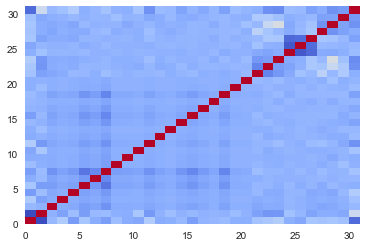

In [72]:
plt.pcolor(model_movies.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plt.show()

#### Regression Models

##### 1) Basic linear regression

In [73]:
from sklearn.model_selection import train_test_split
X_movie = model_movies.iloc[0:,1:31]
y_movie = model_movies.iloc[0:,31]
X_train_movie,X_test_movie,y_train_movie,y_test_movie=train_test_split(X_movie, y_movie, test_size=0.30)

In [74]:
from sklearn import linear_model
linear_basic = linear_model.LinearRegression()
linear_basic.fit(X_train_movie,y_train_movie)

linear_basic_pred = linear_basic.predict(X_test_movie)

In [75]:
def get_classification(predictions,threshold):
    classes = np.zeros_like(predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold: 
            classes[i] = 1
    return classes

linear_basic_pred = get_classification(linear_basic_pred,0.70)

Text(0.5, 257.44, 'Predicted label')

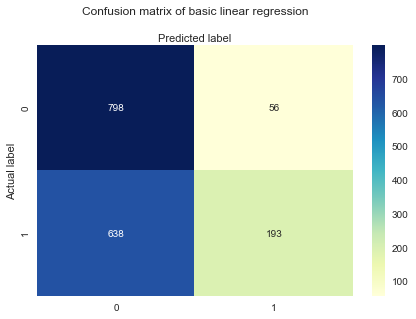

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix_basic_linear = confusion_matrix(y_test_movie, linear_basic_pred) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=["Low movie rating","High movie rating"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_basic_linear), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of basic linear regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
from sklearn import metrics
linear_basic_accuracy = metrics.accuracy_score(y_test_movie, linear_basic_pred)
linear_basic_precision = metrics.precision_score(y_test_movie, linear_basic_pred)
linear_basic_recall = metrics.recall_score(y_test_movie, linear_basic_pred)
print(f"Accuracy: {linear_basic_accuracy:.2f}")
print(f"Precision: {linear_basic_precision:.2f}")
print(f"Recall: {linear_basic_recall:.2f}")

Accuracy: 0.59
Precision: 0.78
Recall: 0.23


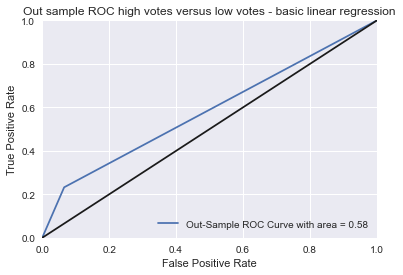

In [78]:
from sklearn.metrics import roc_curve, auc
(fpr, tpr, thresholds) = roc_curve(y_test_movie,linear_basic_pred)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC high votes versus low votes - basic linear regression')
plt.legend(loc="lower right")
plt.show()

##### 2) Lasso regression

In [79]:
from sklearn.model_selection import train_test_split
X_movie = model_movies.iloc[0:,1:31]
y_movie = model_movies.iloc[0:,31]
X_train_movie,X_test_movie,y_train_movie,y_test_movie=train_test_split(X_movie, y_movie, test_size=0.30)

In [80]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 0.548)
lasso.fit(X_train_movie,y_train_movie)
lasso.coef_

array([-0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,
        0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,
       -0., -0., -0., -0.])

##### 3) Ridge regression

In [81]:
from sklearn.model_selection import train_test_split
X_movie = model_movies.iloc[0:,1:31]
y_movie = model_movies.iloc[0:,31]
X_train_movie,X_test_movie,y_train_movie,y_test_movie=train_test_split(X_movie, y_movie, test_size=0.30)

In [82]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 1)
ridge.fit(X_train_movie,y_train_movie)
ridge_pred = ridge.predict(X_test_movie)

In [83]:
ridge_pred = get_classification(ridge_pred,0.70)

Text(0.5, 257.44, 'Predicted label')

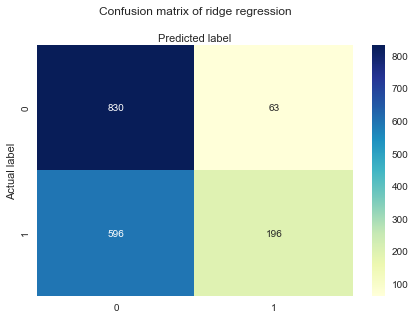

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ridge = confusion_matrix(y_test_movie, ridge_pred) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=["Low movie rating","High movie rating"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_ridge), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of ridge regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [85]:
from sklearn import metrics
ridge_accuracy = metrics.accuracy_score(y_test_movie, ridge_pred)
ridge_precision = metrics.precision_score(y_test_movie, ridge_pred)
ridge_recall = metrics.recall_score(y_test_movie, ridge_pred)
print(f"Accuracy: {ridge_accuracy:.2f}")
print(f"Precision: {ridge_precision:.2f}")
print(f"Recall: {ridge_recall:.2f}")

Accuracy: 0.61
Precision: 0.76
Recall: 0.25


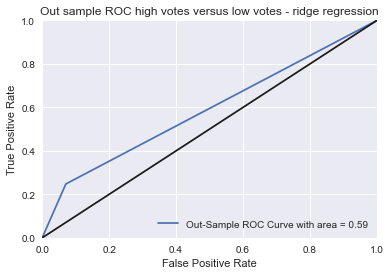

In [86]:
from sklearn.metrics import roc_curve, auc
(fpr, tpr, thresholds) = roc_curve(y_test_movie,ridge_pred)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC high votes versus low votes - ridge regression')
plt.legend(loc="lower right")
plt.show()

#### Classification models

##### 1) Logistic regression

In [87]:
from sklearn.model_selection import train_test_split
X_movie = model_movies.iloc[0:,1:31]
y_movie = model_movies.iloc[0:,31]
X_train_movie,X_test_movie,y_train_movie,y_test_movie=train_test_split(X_movie, y_movie, test_size=0.30)
logistic = linear_model.LogisticRegression(random_state=0)
logistic.fit(X_train_movie,y_train_movie)
logistic_pred = logistic.predict(X_test_movie)

Text(0.5, 257.44, 'Predicted label')

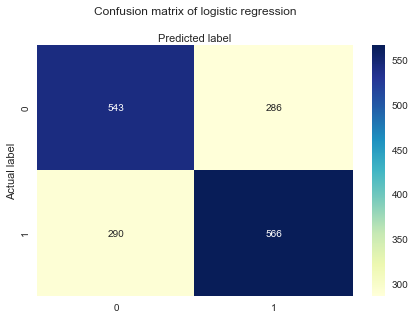

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logistic = confusion_matrix(y_test_movie, logistic_pred) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=["Low movie rating","High movie rating"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_logistic), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [89]:
from sklearn import metrics
logistic_accuracy = metrics.accuracy_score(y_test_movie, logistic_pred)
logistic_precision = metrics.precision_score(y_test_movie, logistic_pred)
logistic_recall = metrics.recall_score(y_test_movie, logistic_pred)
print(f"Accuracy: {logistic_accuracy:.2f}")
print(f"Precision: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")

Accuracy: 0.66
Precision: 0.66
Recall: 0.66


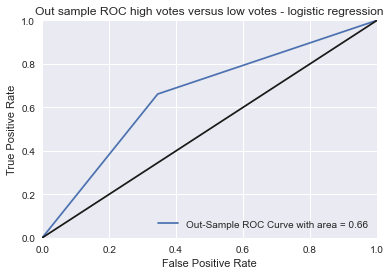

In [90]:
from sklearn.metrics import roc_curve, auc
(fpr, tpr, thresholds) = roc_curve(y_test_movie,logistic_pred)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC high votes versus low votes - logistic regression')
plt.legend(loc="lower right")
plt.show()

##### 2) Decision Tree

In [91]:
from sklearn.model_selection import train_test_split
X_movie = model_movies.iloc[0:,1:31]
y_movie = model_movies.iloc[0:,31]
X_train_movie,X_test_movie,y_train_movie,y_test_movie=train_test_split(X_movie, y_movie, test_size=0.30)

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy') 
decision_tree.fit(X_train_movie,y_train_movie)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

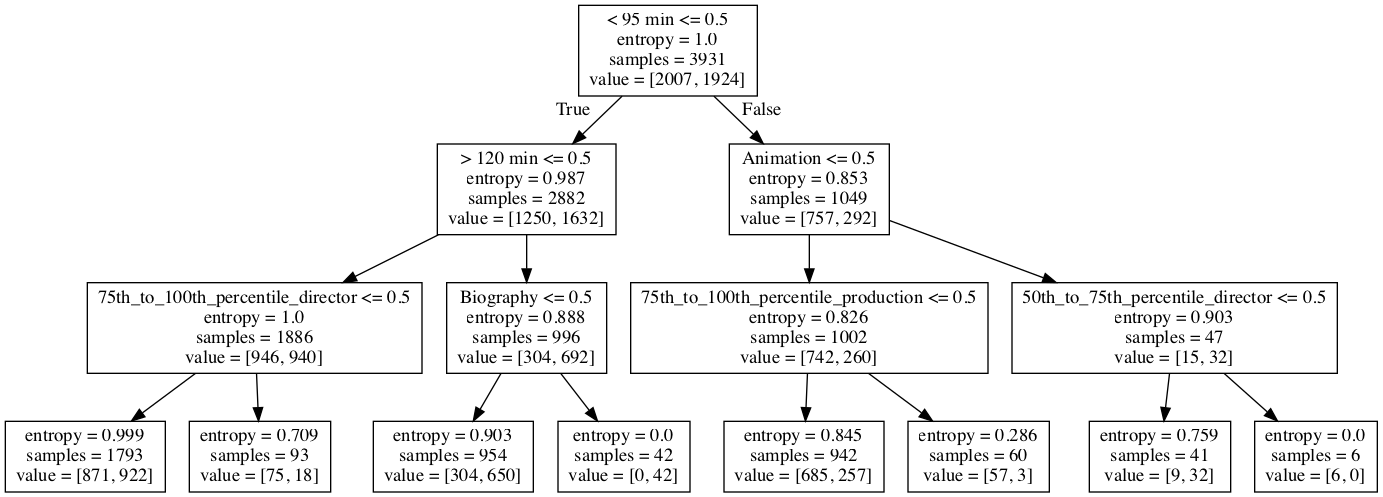

In [93]:
import pydotplus 
from IPython.display import Image
feature_names = [key for key in model_movies if not (key == "title" or key == "high_vote") ]
dot_data = tree.export_graphviz(decision_tree, out_file=None,feature_names=feature_names) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [94]:
tree_pred = decision_tree.predict(X_test_movie)

Text(0.5, 257.44, 'Predicted label')

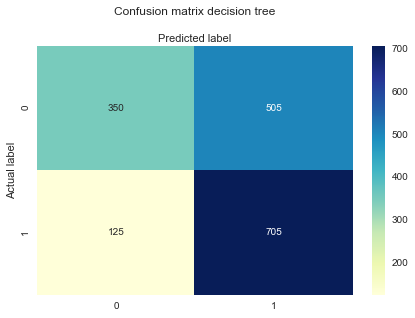

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tree = confusion_matrix(y_test_movie, tree_pred) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=["Low movie rating","High movie rating"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_tree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix decision tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [96]:
from sklearn import metrics
tree_accuracy = metrics.accuracy_score(y_test_movie, tree_pred)
tree_precision = metrics.precision_score(y_test_movie, tree_pred)
tree_recall = metrics.recall_score(y_test_movie, tree_pred)
print(f"Accuracy: {tree_accuracy:.2f}")
print(f"Precision: {tree_precision:.2f}")
print(f"Recall: {tree_recall:.2f}")

Accuracy: 0.63
Precision: 0.58
Recall: 0.85


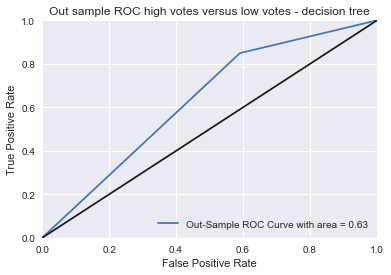

In [97]:
from sklearn.metrics import roc_curve, auc
(fpr, tpr, thresholds) = roc_curve(y_test_movie,tree_pred)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC high votes versus low votes - decision tree')
plt.legend(loc="lower right")
plt.show()

In [98]:
## cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state = 42, shuffle=True)
tree_model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy') 

tree_accuracy_score = cross_val_score(tree_model, X_movie, y_movie, scoring = 'accuracy', cv = cv, n_jobs = -1)
tree_precision_score = cross_val_score(tree_model, X_movie, y_movie, scoring = 'precision', cv = cv, n_jobs = -1)
tree_recall_score = cross_val_score(tree_model, X_movie, y_movie, scoring = 'recall', cv = cv, n_jobs = -1)

print(f'Accuracy: {tree_accuracy_score.mean():.2f}')
print(f'Precision: {tree_precision_score.mean():.2f}')
print(f'Recall: {tree_recall_score.mean():.2f}')

Accuracy: 0.63
Precision: 0.58
Recall: 0.85


##### 3) Random Forest

In [99]:
from sklearn.model_selection import train_test_split
X_movie = model_movies.iloc[0:,1:31]
y_movie = model_movies.iloc[0:,31]
X_train_movie,X_test_movie,y_train_movie,y_test_movie=train_test_split(X_movie, y_movie, test_size=0.30)

In [100]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000) 
forest.fit(X_train_movie,np.ravel(y_train_movie))

RandomForestClassifier(n_estimators=1000)

In [101]:
forest_pred = forest.predict(X_test_movie)

Text(0.5, 257.44, 'Predicted label')

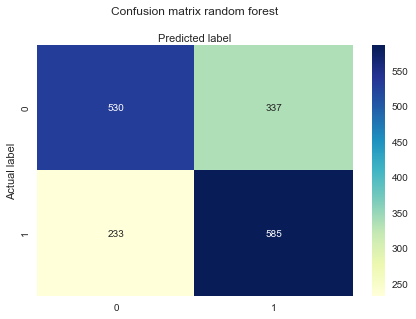

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix_forest = confusion_matrix(y_test_movie, forest_pred) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=["Low movie rating","High movie rating"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_forest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix random forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [103]:
from sklearn import metrics
forest_accuracy = metrics.accuracy_score(y_test_movie, forest_pred)
forest_precision = metrics.precision_score(y_test_movie, forest_pred)
forest_recall = metrics.recall_score(y_test_movie, forest_pred)
print(f"Accuracy: {forest_accuracy:.2f}")
print(f"Precision: {forest_precision:.2f}")
print(f"Recall: {forest_recall:.2f}")

Accuracy: 0.66
Precision: 0.63
Recall: 0.72


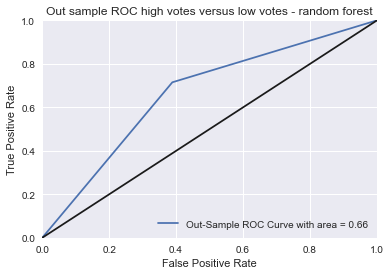

In [104]:
from sklearn.metrics import roc_curve, auc
(fpr, tpr, thresholds) = roc_curve(y_test_movie,forest_pred)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC high votes versus low votes - random forest')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Relative Importance')

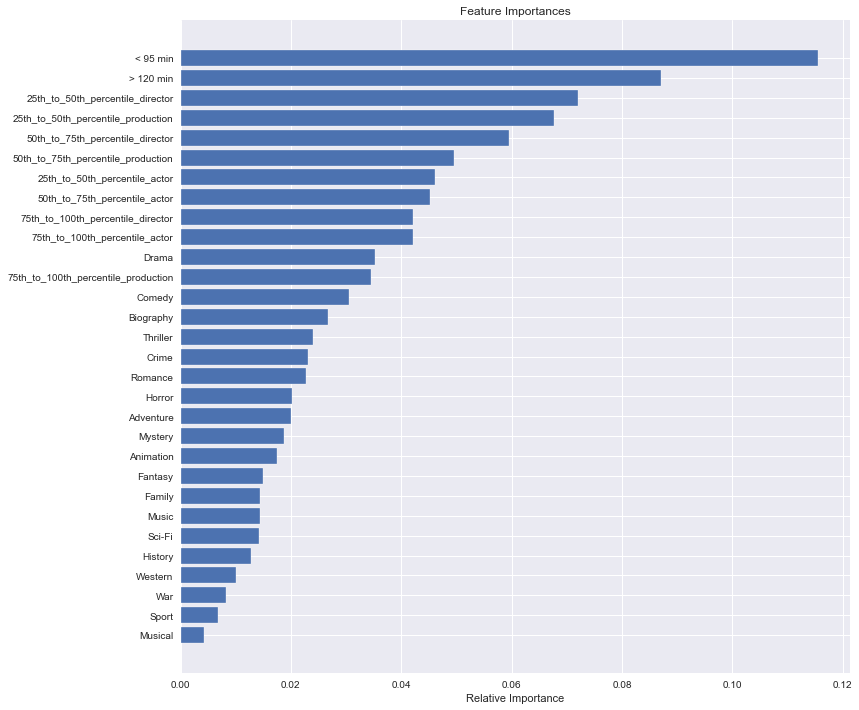

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = forest.feature_importances_ 
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [106]:
## cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state = 42, shuffle=True)
forest_model = RandomForestClassifier(n_estimators=100)

forest_accuracy_score = cross_val_score(forest_model, X_movie, y_movie, scoring = 'accuracy', cv = cv, n_jobs = -1)
forest_precision_score = cross_val_score(forest_model, X_movie, y_movie, scoring = 'precision', cv = cv, n_jobs = -1)
forest_recall_score = cross_val_score(forest_model, X_movie, y_movie, scoring = 'recall', cv = cv, n_jobs = -1)

print(f'Accuracy: {forest_accuracy_score.mean():.2f}')
print(f'Precision: {forest_precision_score.mean():.2f}')
print(f'Recall: {forest_recall_score.mean():.2f}')

Accuracy: 0.66
Precision: 0.64
Recall: 0.69


### Recommendation Machine

In [107]:
column_list = ['title', '< 95 min', '> 120 min', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       '25th_to_50th_percentile_director', '50th_to_75th_percentile_director','75th_to_100th_percentile_director',
       '25th_to_50th_percentile_actor','50th_to_75th_percentile_actor', '75th_to_100th_percentile_actor',
       '25th_to_50th_percentile_production', '50th_to_75th_percentile_production', '75th_to_100th_percentile_production',
        'high_vote']
print(director_25th, director_50th, director_75th)
print(actor_25th, actor_50th, actor_75th)
print(production_25th, production_50th, production_75th)

3970.75 7940.5 11910.25
2500.5 5000.0 7499.5
3868.0 7735.0 11602.0


In [108]:
def get_predict_score_input(duration, genre, director, actor, production_company):
    value_list = list()
    if duration < 95:
        value_list.extend((1,0))
    elif duration >= 95 and duration < 120:
        value_list.extend((0,0))
    else:
        value_list.extend((0,1))
    genre_list = ['Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family','Fantasy', 'History', 'Horror', 'Music', 'Musical','Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']
    for index, genre_name in enumerate(genre_list):
        if genre == genre_name:
            value_list.append(1)
        else:
            value_list.append(0)
    if director_ranking.get(director) != None:
        rank = director_ranking[director]
        if rank <= 3970.75:
            value_list.extend((0,0,0))
        elif rank > 3970.75 and rank <= 7940.5:
            value_list.extend((1,0,0))
        elif rank > 7940.5 and rank <= 11910.25:
            value_list.extend((0,1,0))
        else:
            value_list.extend((0,0,1))
    else:
        value_list.extend((1,0,0))
    if actor_ranking.get(actor) != None:
        rank = actor_ranking[actor]
        if  rank <= 2500.5:
            value_list.extend((0,0,0))
        elif rank  > 2500.5 and rank  <= 5000.0:
            value_list.extend((1,0,0))
        elif rank  > 5000.0 and rank  <= 7499.5:
            value_list.extend((0,1,0))
        else:
            value_list.extend((0,0,1))
    else:
        value_list.extend((1,0,0))
    if production_ranking.get(production_company) != None:
        rank = production_ranking[production_company]
        if rank <= 3868.0:
            value_list.extend((0,0,0))
        elif rank > 3868.0 and rank <= 7735.0:
            value_list.extend((1,0,0))
        elif rank > 7735.0 and rank <= 11602.0:
            value_list.extend((0,1,0))
        else:
            value_list.extend((0,0,1))
    else:
        value_list.extend((1,0,0))
    df = pd.DataFrame(columns = column_list[1:31])
    value_series = pd.Series(value_list, index = df.columns)
    df = df.append(value_series, ignore_index=True)
    return df

In [109]:
def get_recommendation(duration, genre, director, actor, production_company):
    rating = logistic.predict(get_predict_score_input(duration, genre, director, actor,production_company))[0]
    if rating == 1:
        print("------------------------------------------------------------")
        print(f"For a movie of\n GENRE: {genre}\n DURATION: {duration} minutes\n DIRECTOR: {director}\n MAIN ACTOR: {actor}\n PRODUCTION COMPANY: {production_company}")
        print(f"Congratulations, your movie will beat the average rating in the market!")
        print("------------------------------------------------------------")
    else:
        print("------------------------------------------------------------")
        print(f"For a movie of\n GENRE: {genre}\n DURATION: {duration} minutes\n DIRECTOR: {director}\n MAIN ACTOR: {actor}\n PRODUCTION COMPANY: {production_company}")
        print(f"Sorry, your movie will not beat the average rating in the market!")
        print("------------------------------------------------------------")

In [110]:
def modification(duration, genre, director, actor, production_company):
    m = input("Which factor do you want to modify: duration, genre, director, actor, production_company or all?")
    if m.lower() == "duration":
        duration = int(input("What is the duration of your movie in minutes?"))
    elif m.lower() == "genre":
        genre = input("What is the genre of your movie?")
    elif m.lower() == "director":
        director = input("Who is the director?")
    elif m.lower() == "actor":
        actor = input("Who is the main actor?")
    elif m.lower() == "production_company":
        production_company = input("What is the production_company?")
    elif m.lower() == "all":
        duration = int(input("What is the duration of your movie in minutes?"))
        genre = input("What is the genre of your movie?")
        director = input("Who is the director?")
        actor = input("Who is the main actor?")
        production_company = input("What is the production_company?")
    else:
        print("Please enter a valid input")
        modification(duration, genre, director, actor, production_company)
    if m.lower() == "all":
        get_recommendation(duration, genre, director, actor, production_company)
        m_plus = input("Any other modifications: Yes or No?")
        if m_plus == "Yes":
            modification(duration, genre, director, actor, production_company)
        else:
            print("------------------------------------------------------------")
            print("Thanks for using our recommendation system. Have a wonderful day!")
            print("------------------------------------------------------------")
    else:
        m_plus = input("Any other modifications: Yes or No?")
        if m_plus == "Yes":
            modification(duration, genre, director, actor, production_company)
        else:
            rating = logistic.predict(get_predict_score_input(duration, genre, director, actor, production_company))[0]
            if rating == 1:
                print("------------------------------------------------------------")
                print(f"For a movie of\n GENRE: {genre}\n DURATION: {duration} minutes\n DIRECTOR: {director}\n MAIN ACTOR: {actor}\n PRODUCTION COMPANY: {production_company}")
                print(f"Congratulations, your movie will beat the average rating in the market!")
                print("------------------------------------------------------------")
                modify = input("Do you want to try another combination: Yes or No?")
                if modify == "Yes":
                    modification(duration, genre, director, actor, production_company)
                else:
                    print("------------------------------------------------------------")
                    print("Thanks for using our recommendation system. Have a wonderful day!")
                    print("------------------------------------------------------------")
            else:
                print("------------------------------------------------------------")
                print(f"For a movie of\n GENRE: {genre}\n DURATION: {duration} minutes\n DIRECTOR: {director}\n MAIN ACTOR: {actor}\n PRODUCTION COMPANY: {production_company}")
                print(f"Sorry, your movie will not beat the average rating in the market!")
                print("------------------------------------------------------------")
                modify = input("Do you want to try another combination: Yes or No?")
                if modify == "Yes":
                    modification(duration, genre, director, actor, production_company)
                else:
                    print("------------------------------------------------------------")
                    print("Thanks for using our recommendation system. Have a wonderful day!")
                    print("------------------------------------------------------------")
def director_recommendations(duration, genre, director, actor, production_company):
    get_recommendation(duration, genre, director, actor, production_company)
    modify = input("Do you want to try another combination: Yes or No?")
    if modify == "Yes":
        modification(duration, genre, director, actor, production_company)
    else:
        print("------------------------------------------------------------")
        print("Thanks for using our recommendation system. Have a wonderful day!")
        print("------------------------------------------------------------")

In [111]:
duration = int(input("What is the duration of your movie in minutes?"))
genre = input("What is the genre of your movie?")
director = input("Who is the director?")
actor = input("Who is the main actor?")
production_company = input("What is the production_company?")
director_recommendations(duration, genre, director, actor, production_company)

What is the duration of your movie in minutes? 128
What is the genre of your movie? Action
Who is the director? Guy Ritchie
Who is the main actor? Jude Law
What is the production_company? Warner Bros.


------------------------------------------------------------
For a movie of
 GENRE: Action
 DURATION: 128 minutes
 DIRECTOR: Guy Ritchie
 MAIN ACTOR: Jude Law
 PRODUCTION COMPANY: Warner Bros.
Congratulations, your movie will beat the average rating in the market!
------------------------------------------------------------


Do you want to try another combination: Yes or No? No


------------------------------------------------------------
Thanks for using our recommendation system. Have a wonderful day!
------------------------------------------------------------


In [112]:
#DURATION: 128 minutes
#GENRE: Action
#DIRECTOR: Guy Ritchie
#MAIN ACTOR: Jude Law
#PRODUCTION COMPANY: Warner Bros.